<a href="https://colab.research.google.com/github/ldsAS/Tibame-AI-Learning/blob/main/Tibame20250509_LAB_VideoGameSales_%E8%A7%A3%E7%AD%94%E7%89%88_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 完成後請寄到EMAIL : clement.class.02@gmail.com
* 信件主旨請設定為： 05-02.LAB_VideoGameSales_學號_姓名  (例: "05-02.LAB_VideoGameSales_00_陳仁政")
* 附件檔名請設定為： 05-02.LAB_VideoGameSales_學號_姓名.ipynb (例: "05-02.LAB_VideoGameSales_00_陳仁政.ipynb")

# Video Game Sales
- https://www.kaggle.com/gregorut/videogamesales
- https://www.kaggle.com/snanilim/video-games-sales-analysis-and-visualization

<div><p>This dataset contains a list of video games with sales greater than 100,000 copies.  It was generated by a scrape of <a href="http://www.vgchartz.com/" target="_blank">vgchartz.com</a>.</p>
<p>Fields include</p>
<ul>
<li><p>Rank - Ranking of overall sales</p></li>
<li><p>Name - The games name</p></li>
<li><p>Platform - Platform of the games release (i.e. PC,PS4, etc.)</p></li>
<li><p>Year - Year of the game's release</p></li>
<li><p>Genre - Genre of the game</p></li>
<li><p>Publisher - Publisher of the game</p></li>
<li><p>NA_Sales - Sales in North America (in millions)</p></li>
<li><p>EU_Sales - Sales in Europe (in millions)</p></li>
<li><p>JP_Sales - Sales in Japan (in millions)</p></li>
<li><p>Other_Sales - Sales in the rest of the world (in millions)</p></li>
<li><p>Global_Sales - Total worldwide sales.</p></li>
</ul>
<p>The script to scrape the data is available at <a href="https://github.com/GregorUT/vgchartzScrape" target="_blank">https://github.com/GregorUT/vgchartzScrape</a>.<br>
It is based on BeautifulSoup using Python.<br>
There are 16,598 records.  2 records were dropped due to incomplete information.</p></div>

## 載入與整理資料

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
data = pd.read_csv("../content/vgsales.csv")
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [2]:
#查看資料筆數跟欄位數目
data.shape

(16598, 11)

In [3]:
# 檢查資料欄位的型態，以及缺失狀況
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
# 計算各欄位資料缺失狀況
data.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
# # 年份的格式錯誤，所以需要更改成整數型態
# data['Year'].replace(np.nan, 0, inplace=True) #因為整數沒有nan，所以需要先將nan改成 0
# data['Year'] = data['Year'].astype('int32') #改變年份的資料型態
# data.head()

In [5]:
# 查看一下資料的基本統計值
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


↑ 問題：為何各地區的銷售數量的平均跟中位數都差異那麼大？

# 哪一種類的電玩最受歡迎

In [6]:
# 計算各種電玩類別的總數
data['Genre'].value_counts()

,count
Genre,
Action,3316
Sports,2346
Misc,1739
Role-Playing,1488
Shooter,1310
Adventure,1286
Racing,1249
Platform,886
Simulation,867


In [ ]:
# 練習題
# 找出遊戲總數最多的前三年

In [ ]:
# 練習題
# 找出遊戲總數最多的前三個遊戲商

In [ ]:
# 練習題
# 找出遊戲總數最多的前三個平台

In [ ]:
# 練習題
# 找出遊戲總銷售額最多的前三個平台

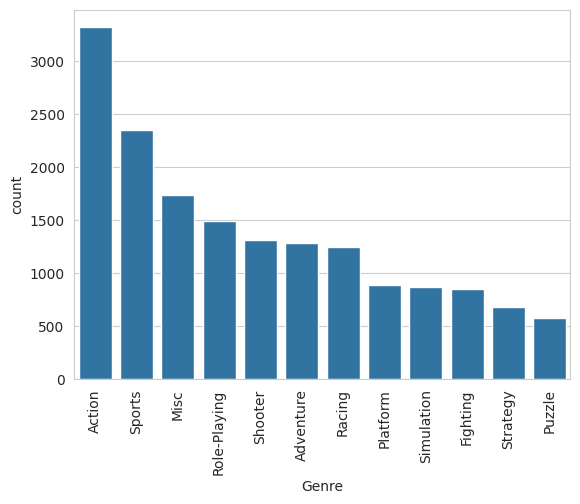

In [7]:
# 畫出直方圖用來顯示不同電玩總類的總數
sns.countplot(x="Genre", #電玩總類的欄位名稱
              data=data, #資料
              order=data['Genre'].value_counts().index
             )
plt.xticks(rotation=90) #將X軸的標示文字轉置90度
plt.show()

In [ ]:
#練習題
#畫出每個平台的遊戲數目

In [ ]:
#練習題
#畫出每個發行商的遊戲數目

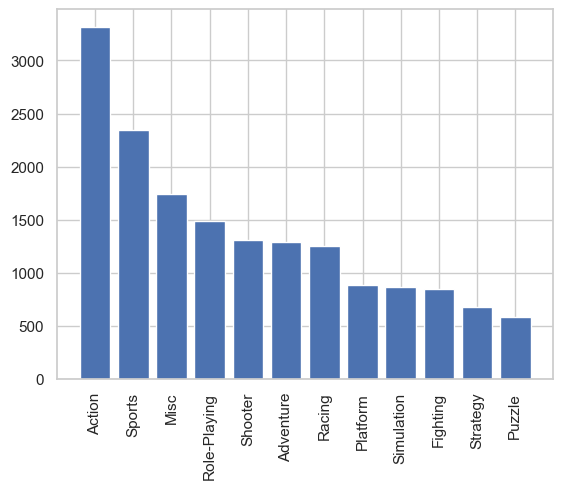

In [ ]:
# 畫出直方圖用來顯示不同電玩總類的總數 (限制使用 Matplotlib)
vc = data['Genre'].value_counts()
plt.bar(vc.index, vc)
plt.xticks(rotation=90)
plt.show()

# 每年的遊戲數目 countplot()

In [ ]:
# 統計每一年遊戲發行的總數
data['Year'].value_counts()

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64

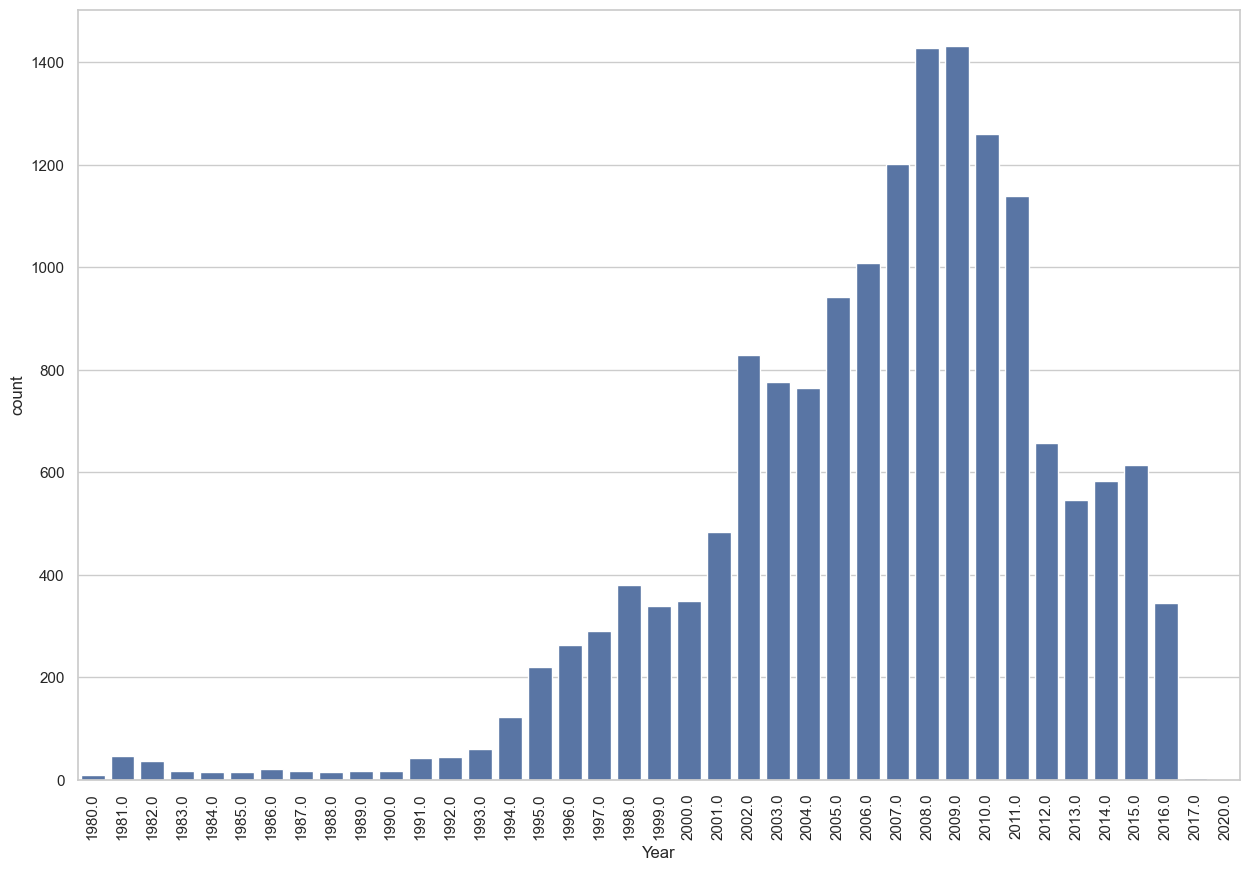

In [ ]:
# 畫出直方圖用來顯示每一年發行的遊戲數目
plt.figure(figsize=(15, 10))
sns.countplot(x="Year"
              ,data=data
             )
plt.xticks(rotation=90)
plt.show()

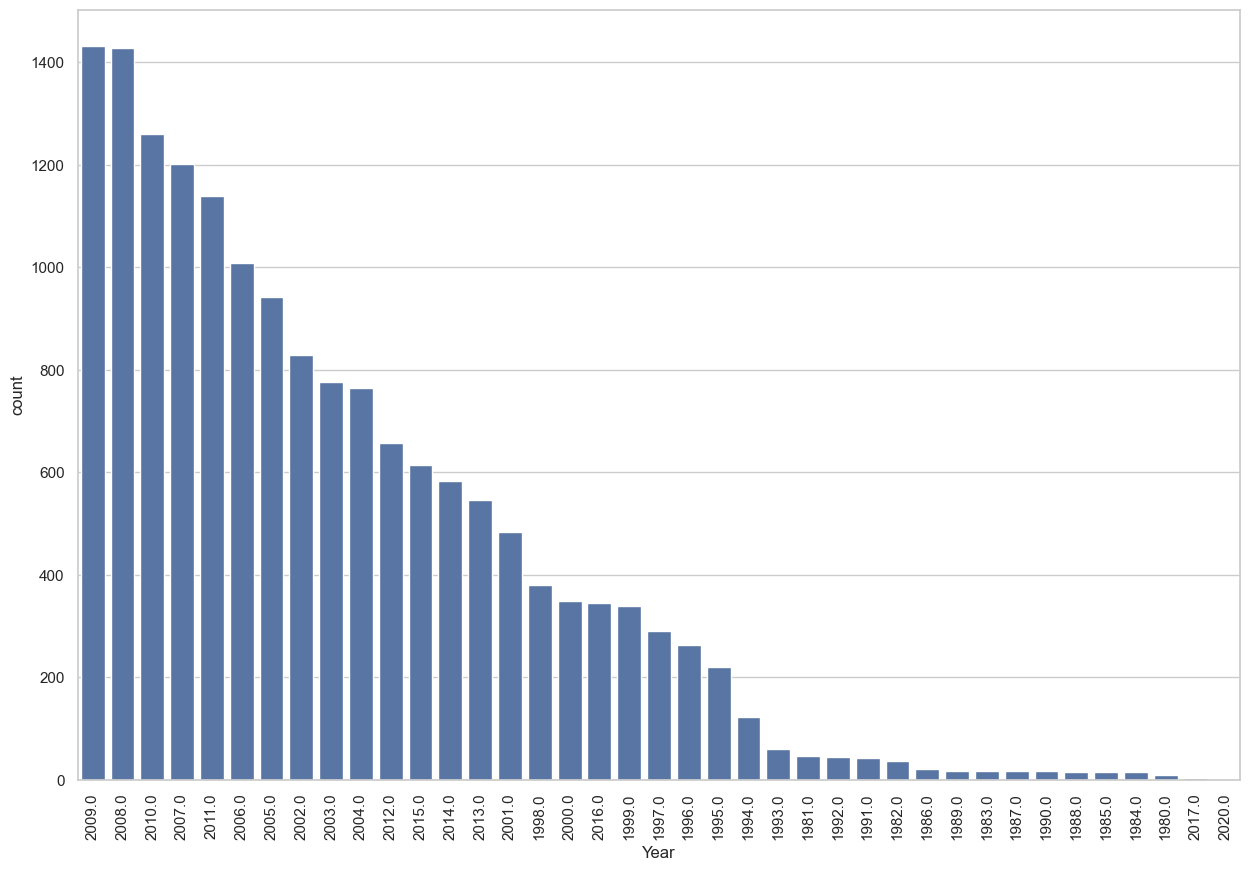

In [ ]:
# 將上面的直方圖根據發行遊戲數目來排序
# 提示 countplot() 中有個參數order可以用來限制X軸的順序
# 要先產生正確的Year順序當成order的資料
plt.figure(figsize=(15, 10))
sns.countplot(x="Year"
              ,data=data
              # ,order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index
              ,order = data['Year'].value_counts().index
             )
plt.xticks(rotation=90)
plt.show()

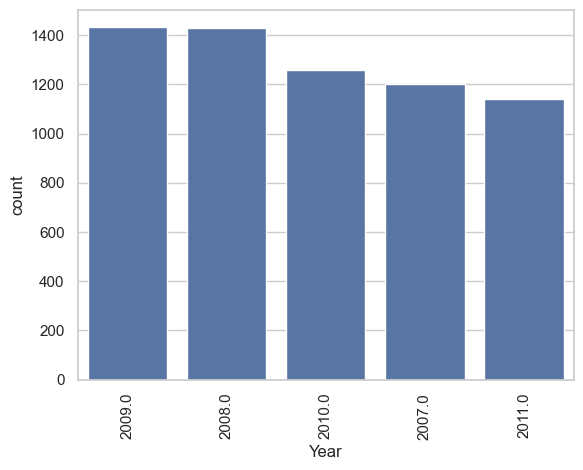

In [ ]:
# 根據上圖，但是只顯示前五個發行遊戲最多的年份
# plt.figure(figsize=(15, 10))
sns.countplot(x="Year"
              ,data=data
              # ,order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index
              ,order = data['Year'].value_counts().index[:5]
             )
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 練習題
# 畫出發行遊戲最多的前五名發行商

In [ ]:
# 練習題
# 畫出發行遊戲最多的前五種平台

### 加入hue

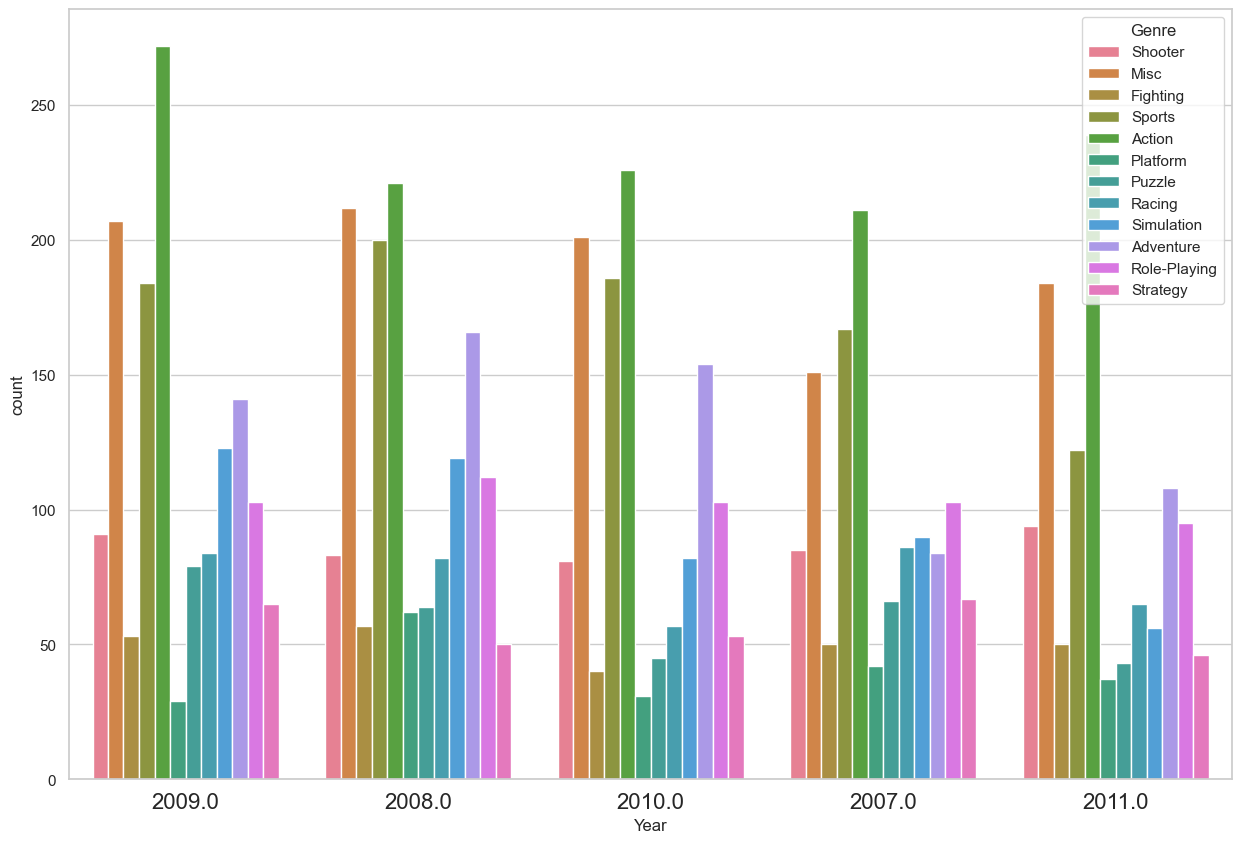

In [ ]:
# 畫出直方圖顯示：
# 發行電玩數量最多的前五年的數量
# 依據電玩種類分別顯示
plt.figure(figsize=(15, 10))
sns.countplot(x="Year" #年份的欄位
              ,data=data #資料
              ,hue='Genre' #進一步細分的欄位
              ,order=data.Year.value_counts().iloc[:5].index #只取出前五名
             )
plt.xticks(size=16)
plt.show()

In [ ]:
#練習題
# 畫出直方圖顯示：
# 發行電玩數目最多的前五個平台
# 依據電玩種類分別顯示發行遊戲數目

# 每年的遊戲銷售總量 barplot()

In [ ]:
# 計算每年遊戲的銷售總量
data_year = data.groupby('Year')['Global_Sales'].sum()
data_year

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    419.31
2005.0    459.94
2006.0    521.04
2007.0    611.13
2008.0    678.90
2009.0    667.30
2010.0    600.45
2011.0    515.99
2012.0    363.54
2013.0    368.11
2014.0    337.05
2015.0    264.44
2016.0     70.93
2017.0      0.05
2020.0      0.29
Name: Global_Sales, dtype: float64

In [ ]:
# 將Year從索引重新變成欄位
data_year = data_year.reset_index()
data_year

,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36
5,1985.0,53.94
6,1986.0,37.07
7,1987.0,21.74
8,1988.0,47.22
9,1989.0,73.45


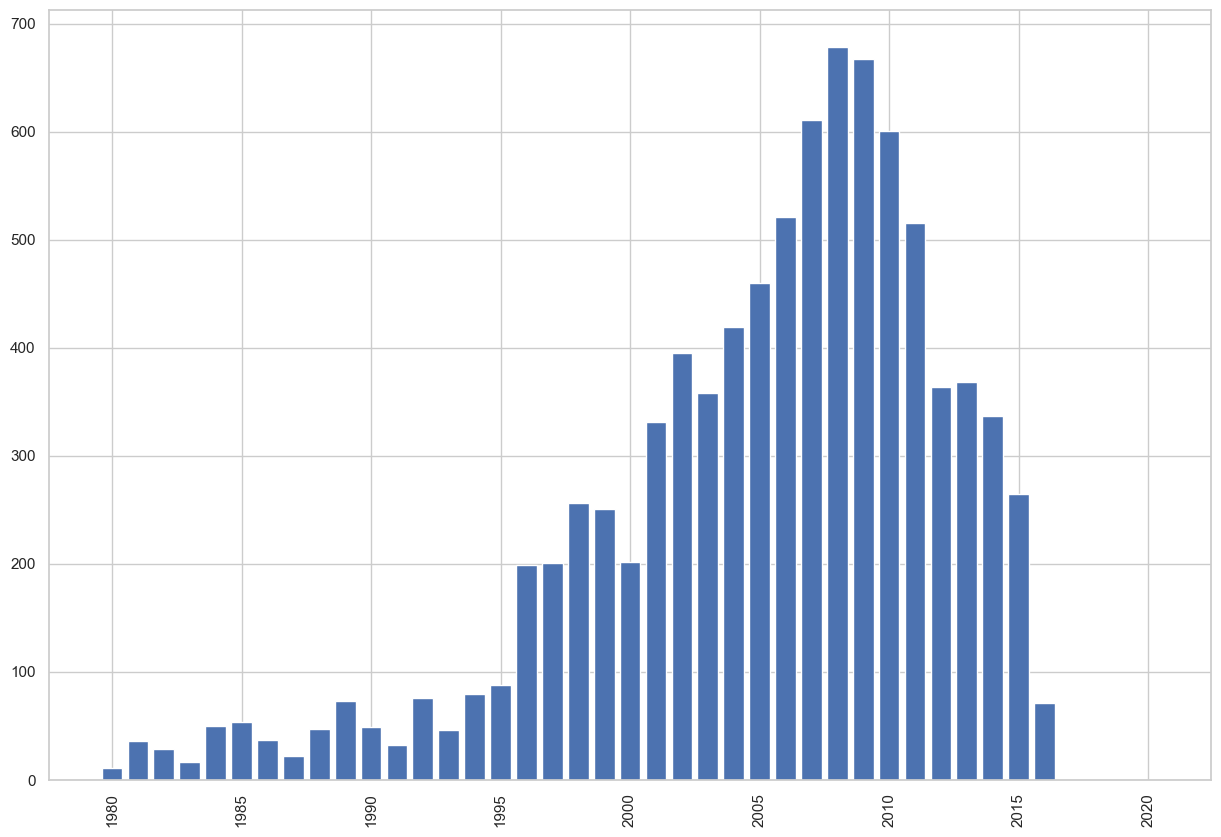

In [ ]:
#限制使用Matplotlib來畫出每年遊戲的銷售總量
plt.figure(figsize=(15, 10))
plt.bar(data_year['Year'], data_year['Global_Sales'])
plt.xticks(rotation=90)
plt.show()

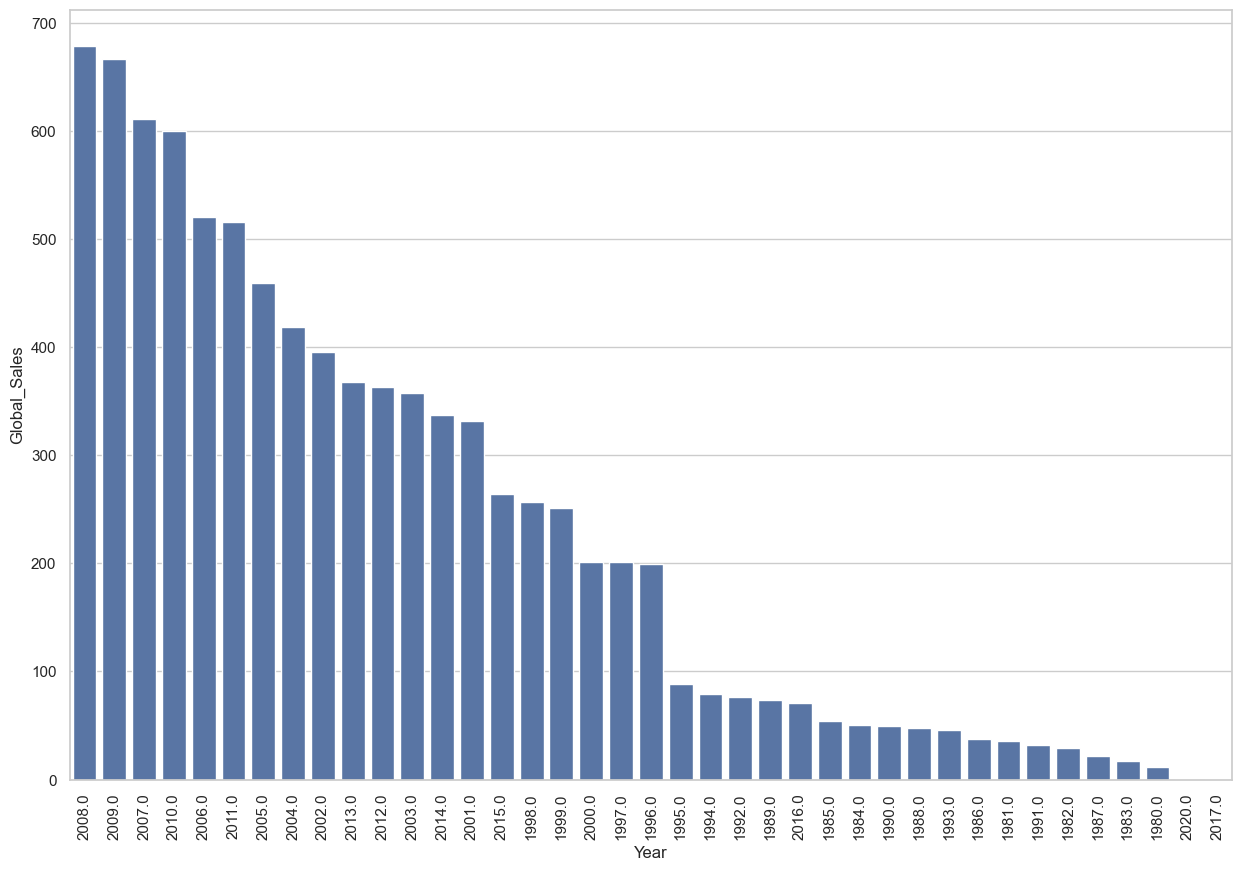

In [ ]:
# 將上圖依照全年銷售額來排序
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year
           ,order=data_year.sort_values(by='Global_Sales', ascending=False).Year)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#練習題
#請畫出各平台的銷售總額


In [ ]:
#練習題
#請畫出各遊戲種類的北美銷售總額


In [ ]:
#練習題
#請畫出各遊戲發行商的北美加歐洲銷售總額


## 每年分別哪一種遊戲種類的發行數目最多？

In [ ]:
# 根據 年份與遊戲種類 來做群組，並計算每個群組的總數
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_df

,Year,Genre,count
0,1980.0,Action,1
1,1980.0,Fighting,1
2,1980.0,Misc,4
3,1980.0,Shooter,2
4,1980.0,Sports,1
...,...,...,...
384,2016.0,Sports,38
385,2016.0,Strategy,10
386,2017.0,Action,1
387,2017.0,Role-Playing,2


In [ ]:
# 依據年份的不同，計算每年中遊戲種類數量最多的那個數量
year_max_df.groupby(['Year'])['count'].max()

Year
1980.0      4
1981.0     25
1982.0     18
1983.0      7
1984.0      3
1985.0      4
1986.0      6
1987.0      4
1988.0      4
1989.0      5
1990.0      3
1991.0      7
1992.0      7
1993.0     11
1994.0     22
1995.0     29
1996.0     52
1997.0     46
1998.0     70
1999.0     62
2000.0     81
2001.0     96
2002.0    188
2003.0    144
2004.0    125
2005.0    192
2006.0    184
2007.0    211
2008.0    221
2009.0    272
2010.0    226
2011.0    239
2012.0    266
2013.0    148
2014.0    186
2015.0    255
2016.0    119
2017.0      2
2020.0      1
Name: count, dtype: int64

In [ ]:
#將上面的結束使用transform對應回去原本的資料表
year_max_df.groupby(['Year'])['count'].transform(max)

C:\Users\Clement\AppData\Local\Temp\ipykernel_21972\1261284494.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  year_max_df.groupby(['Year'])['count'].transform(max)


0        4
1        4
2        4
3        4
4        4
      ... 
384    119
385    119
386      2
387      2
388      1
Name: count, Length: 389, dtype: int64

In [ ]:
#找出year_max_df中那些資料的欄位'count'值與上面找出的最大值一樣
year_max_idx = year_max_df.groupby(['Year'])['count'].transform('max') == year_max_df['count']
year_max_df[year_max_idx]

,Year,Genre,count
2,1980.0,Misc,4
5,1981.0,Action,25
12,1982.0,Action,18
19,1983.0,Action,7
29,1984.0,Puzzle,3
30,1984.0,Racing,3
31,1984.0,Shooter,3
35,1985.0,Platform,4
36,1985.0,Puzzle,4
40,1986.0,Action,6


In [ ]:
#將上面的程式整合在一起
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx]#.reset_index(drop=True)

#因為每年可能會有不同類型的遊戲發行數目一樣，所以去除重複的
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last')
year_max_genre.head()

C:\Users\Clement\AppData\Local\Temp\ipykernel_21972\1960590723.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']


,Year,Genre,count
2,1980.0,Misc,4
5,1981.0,Action,25
12,1982.0,Action,18
19,1983.0,Action,7
31,1984.0,Shooter,3


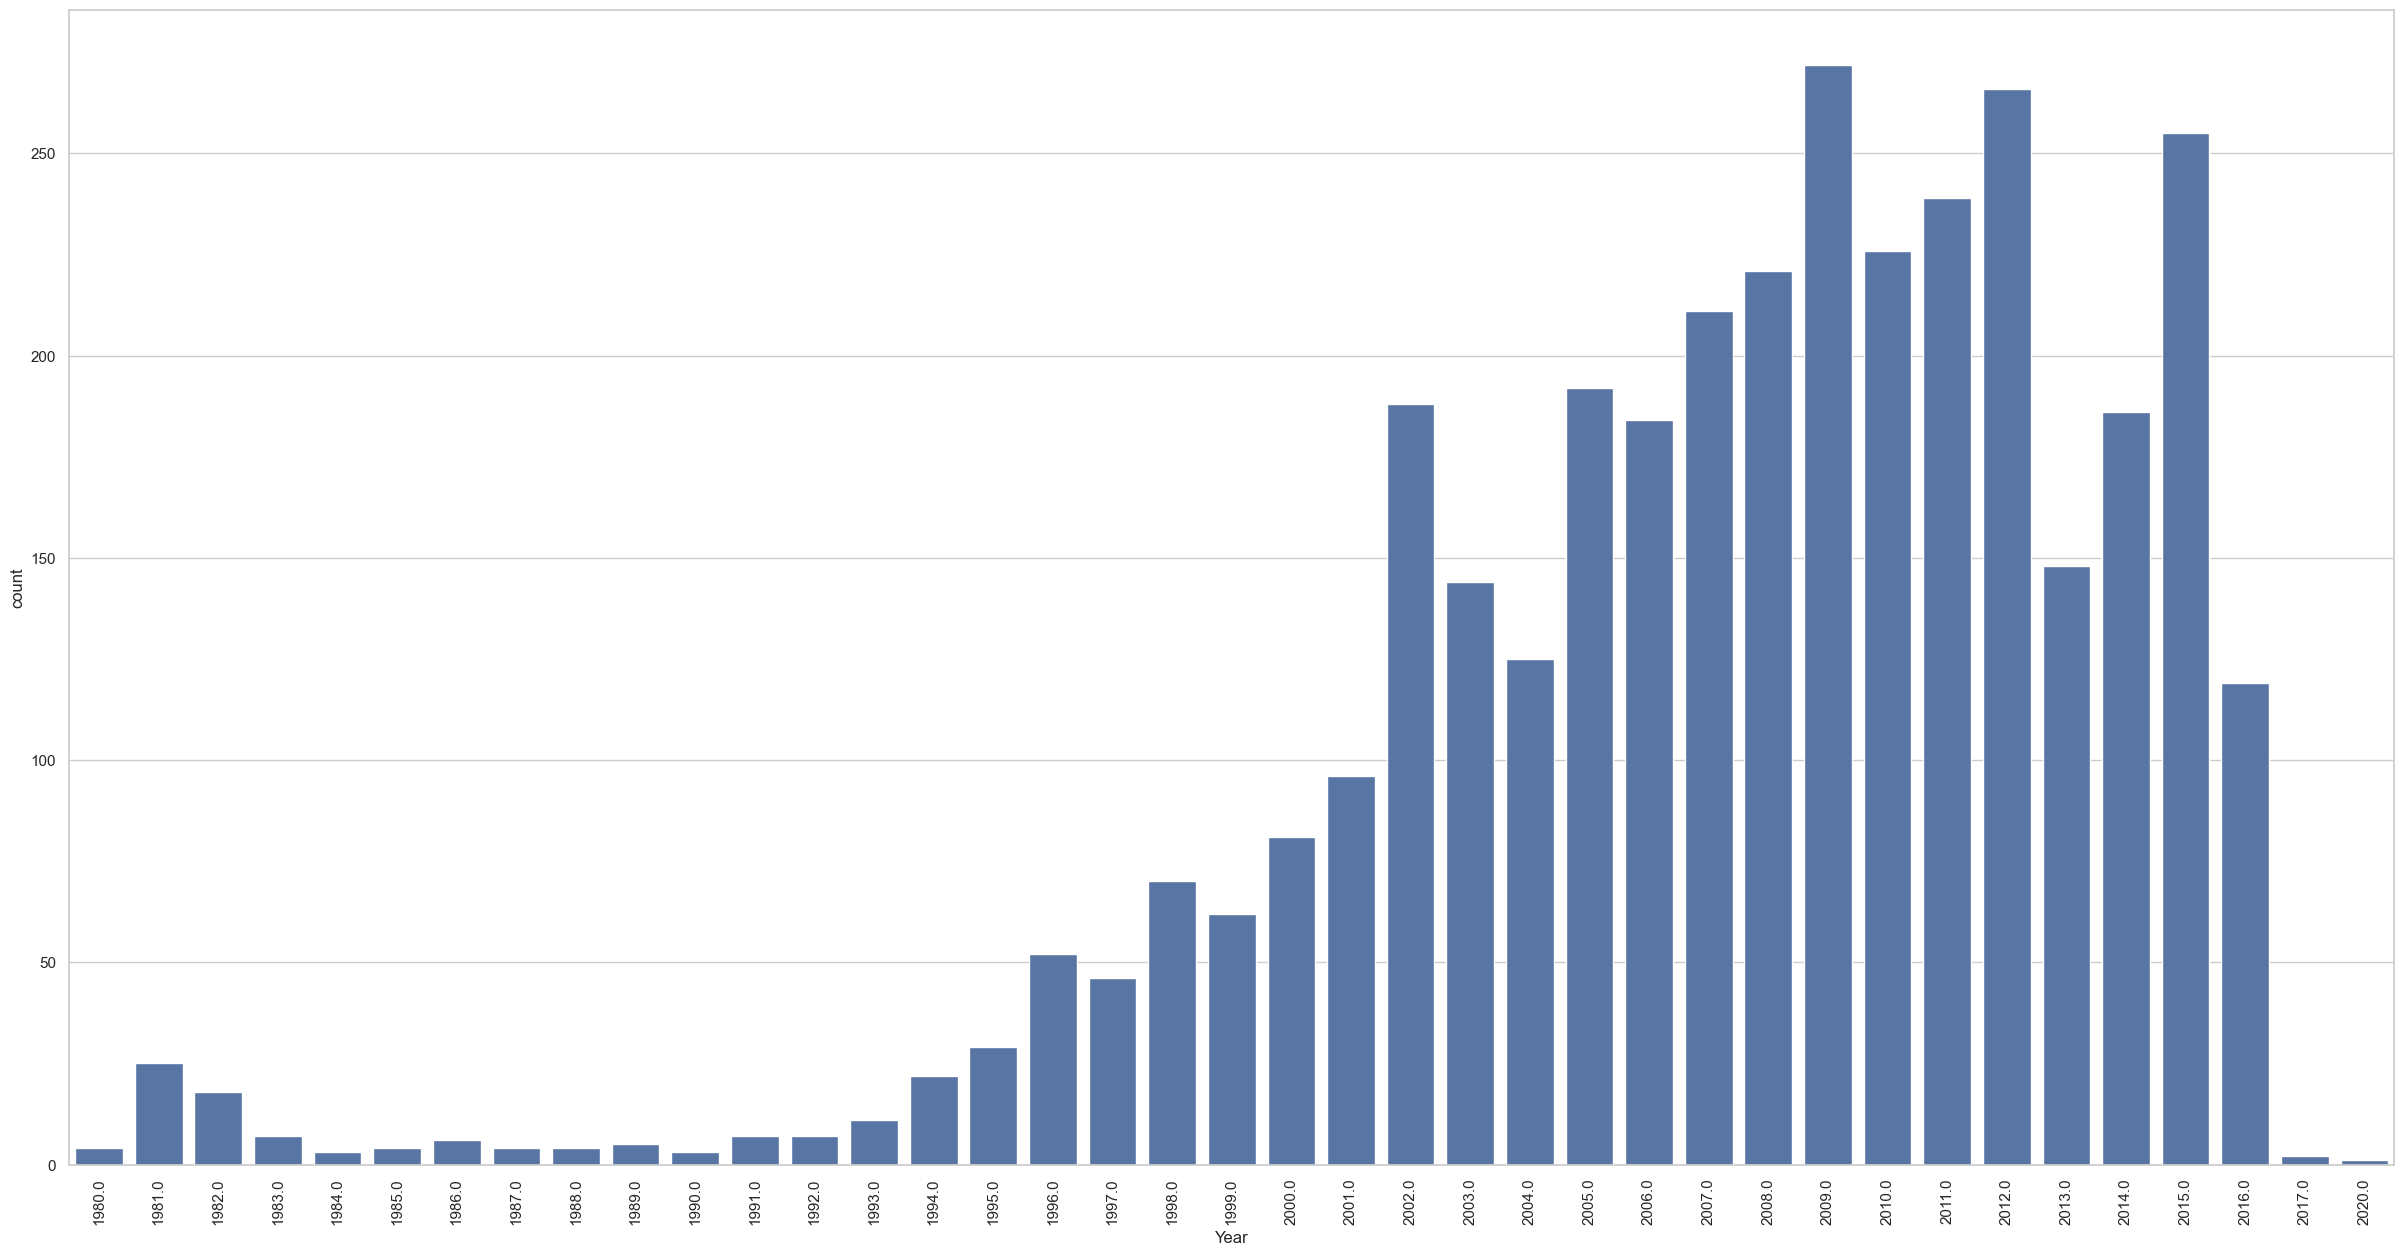

In [ ]:
# 使用直方圖來顯示上面表格的結果
plt.figure(figsize=(30, 15))
sns.barplot(x='Year', y='count', data=year_max_genre)
plt.xticks(rotation=90)
plt.show()

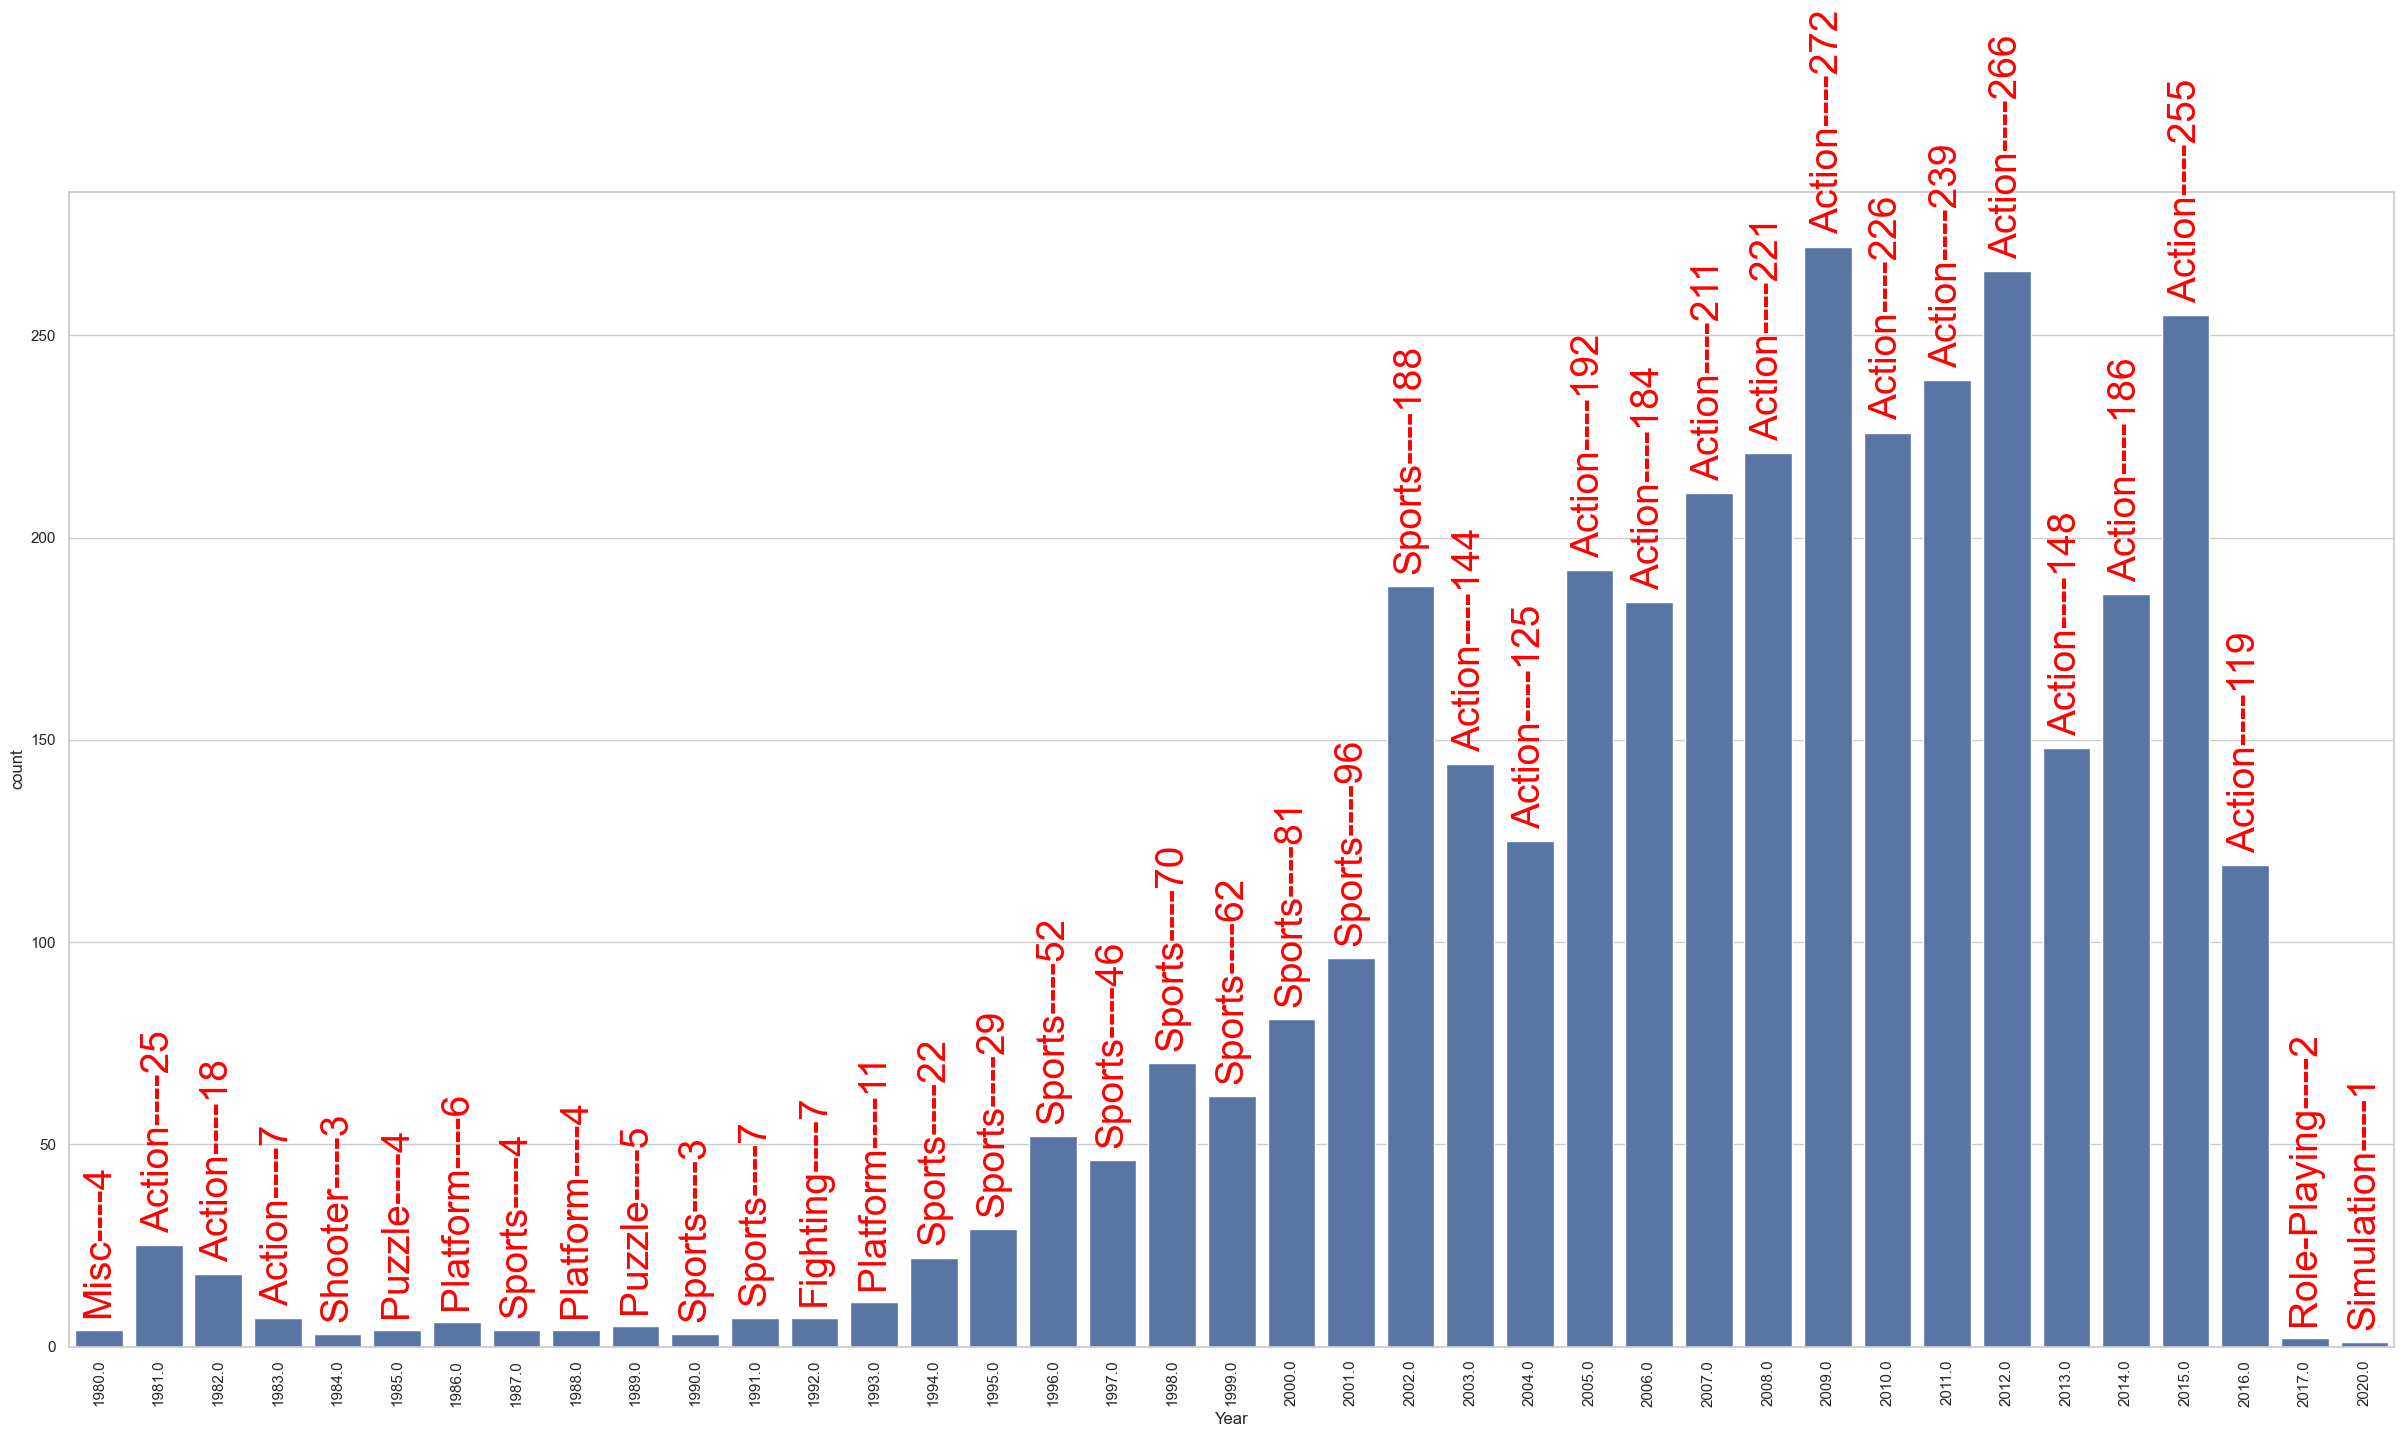

In [ ]:
# 在每個直方圖條上用文字顯示對應的遊戲種類與數量
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)

#標示出每個直條代表的類型跟數目
genre = year_max_genre['Genre'].values
index = 0
for value in year_max_genre['count'].values:
    g.text(index, value+5,
           str(genre[index] + '----' +str(value)),
           color='#FF0000', size=28, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 練習題
# 請將上圖改成依照發行數目排序


In [ ]:
# 練習題
# 請計算每年哪一種平台的遊戲數目最多


In [ ]:
# 練習題
# 請計算每一個平台，哪一年的遊戲數目最多


In [ ]:
# 練習題
# 請計算每一個類型，哪一年的遊戲數目最多


## 每年哪一種電玩種類的銷售數量最多？

In [ ]:
# 根據 年份 跟 遊戲種類來進行群組，並計算每個群組的全球銷售總額
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale_dx

,Year,Genre,Global_Sales
0,1980.0,Action,0.34
1,1980.0,Fighting,0.77
2,1980.0,Misc,2.71
3,1980.0,Shooter,7.07
4,1980.0,Sports,0.49
...,...,...,...
384,2016.0,Sports,14.60
385,2016.0,Strategy,0.50
386,2017.0,Action,0.01
387,2017.0,Role-Playing,0.04


In [ ]:
# 根據年份分別找出該年份中那些遊戲種類的銷售總額是最大的
year_sale_index = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_dx[year_sale_index]

C:\Users\Clement\AppData\Local\Temp\ipykernel_21972\1388424985.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  year_sale_index = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']


,Year,Genre,Global_Sales
3,1980.0,Shooter,7.07
5,1981.0,Action,14.84
15,1982.0,Puzzle,10.03
22,1983.0,Platform,6.93
31,1984.0,Shooter,31.10
35,1985.0,Platform,43.17
40,1986.0,Action,13.74
48,1987.0,Fighting,5.42
54,1988.0,Platform,27.73
64,1989.0,Puzzle,37.75


In [ ]:
#將上面的程式整合在一起
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
year_sale_max.head()

C:\Users\Clement\AppData\Local\Temp\ipykernel_21972\1335145945.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']


,Year,Genre,Global_Sales
0,1980.0,Shooter,7.07
1,1981.0,Action,14.84
2,1982.0,Puzzle,10.03
3,1983.0,Platform,6.93
4,1984.0,Shooter,31.10


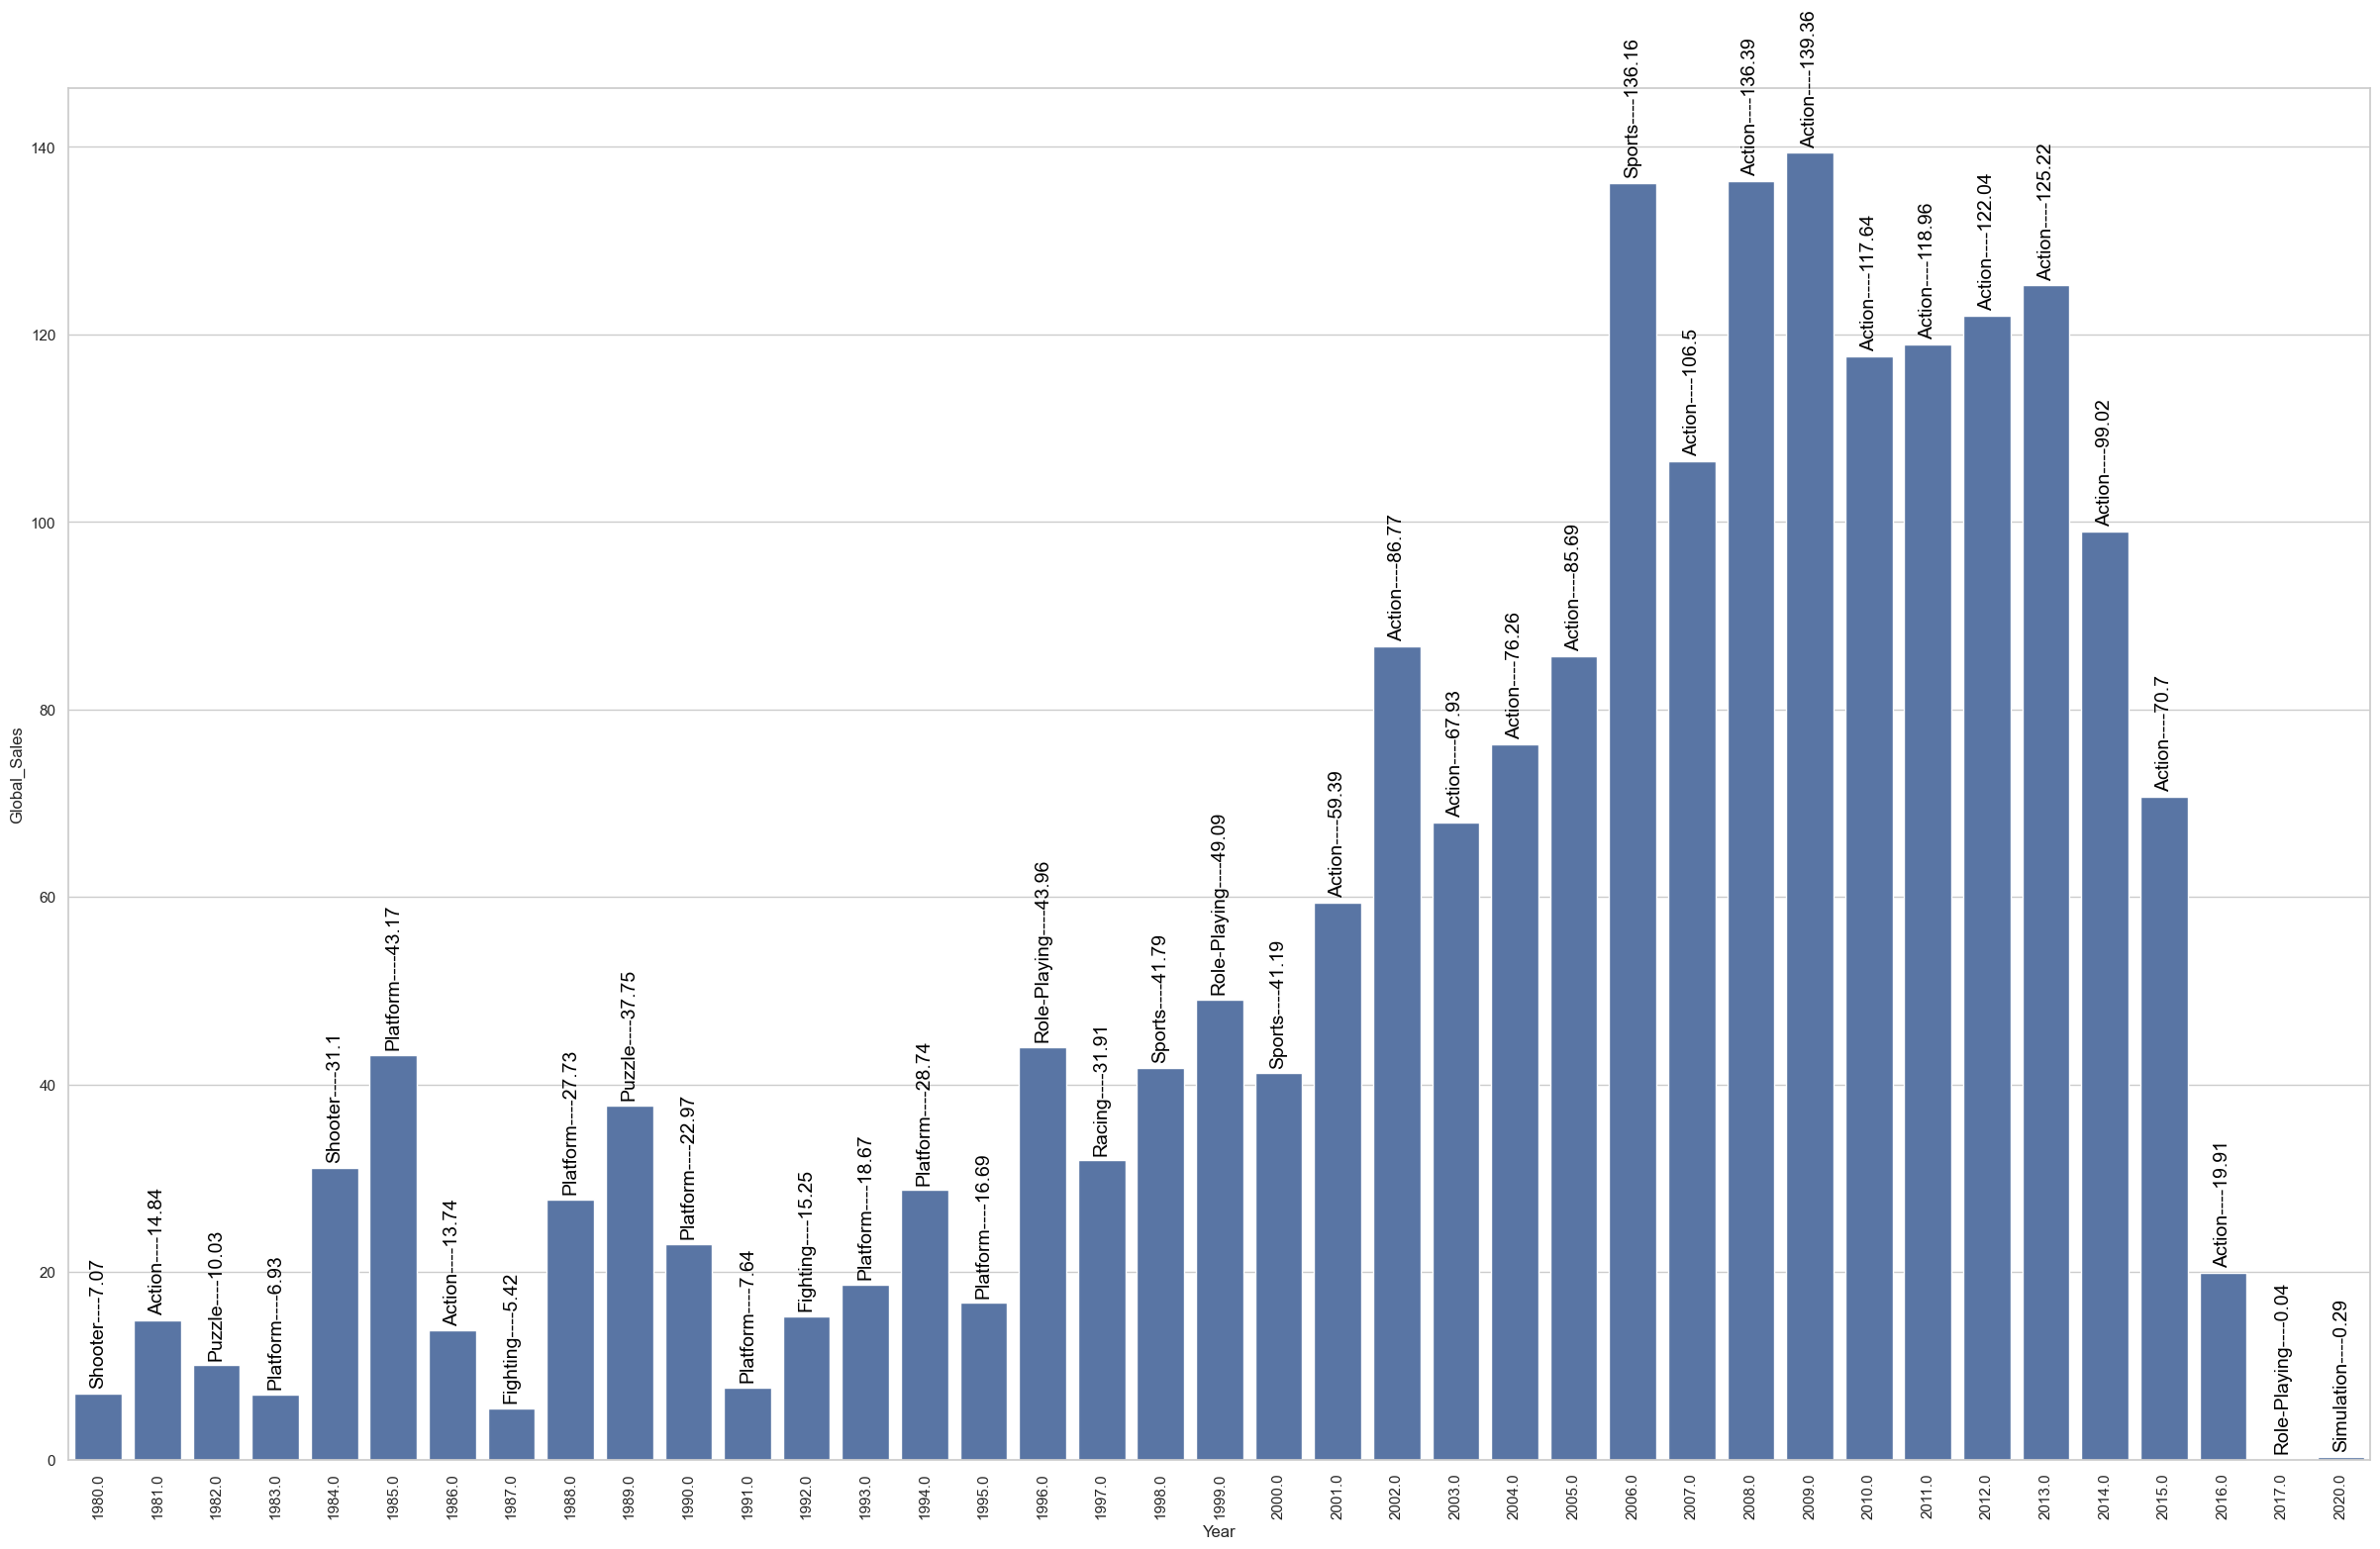

In [ ]:
# 使用直方圖畫出來
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)

genre = year_sale_max['Genre']
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1,
           str(genre[index] + '----' +str(round(value, 2))), # round() 四捨五入到指定的小數位
           color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

In [ ]:
# 練習題
# 請將上圖改成依照銷售數量排序

In [ ]:
# 練習題
# 請計算每年哪一種平台的遊戲銷售量最多

In [ ]:
# 練習題
# 請計算每一個平台，哪一年的遊戲銷售量最多

In [ ]:
# 練習題
# 請計算每一個平台，哪類型的遊戲銷售量最多

## 哪一種遊戲全球的銷售總數量最高？

In [ ]:
# 根據遊戲種類進行群組，個別計算全球銷售總數
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
data_genre.head()

,Genre,Global_Sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37


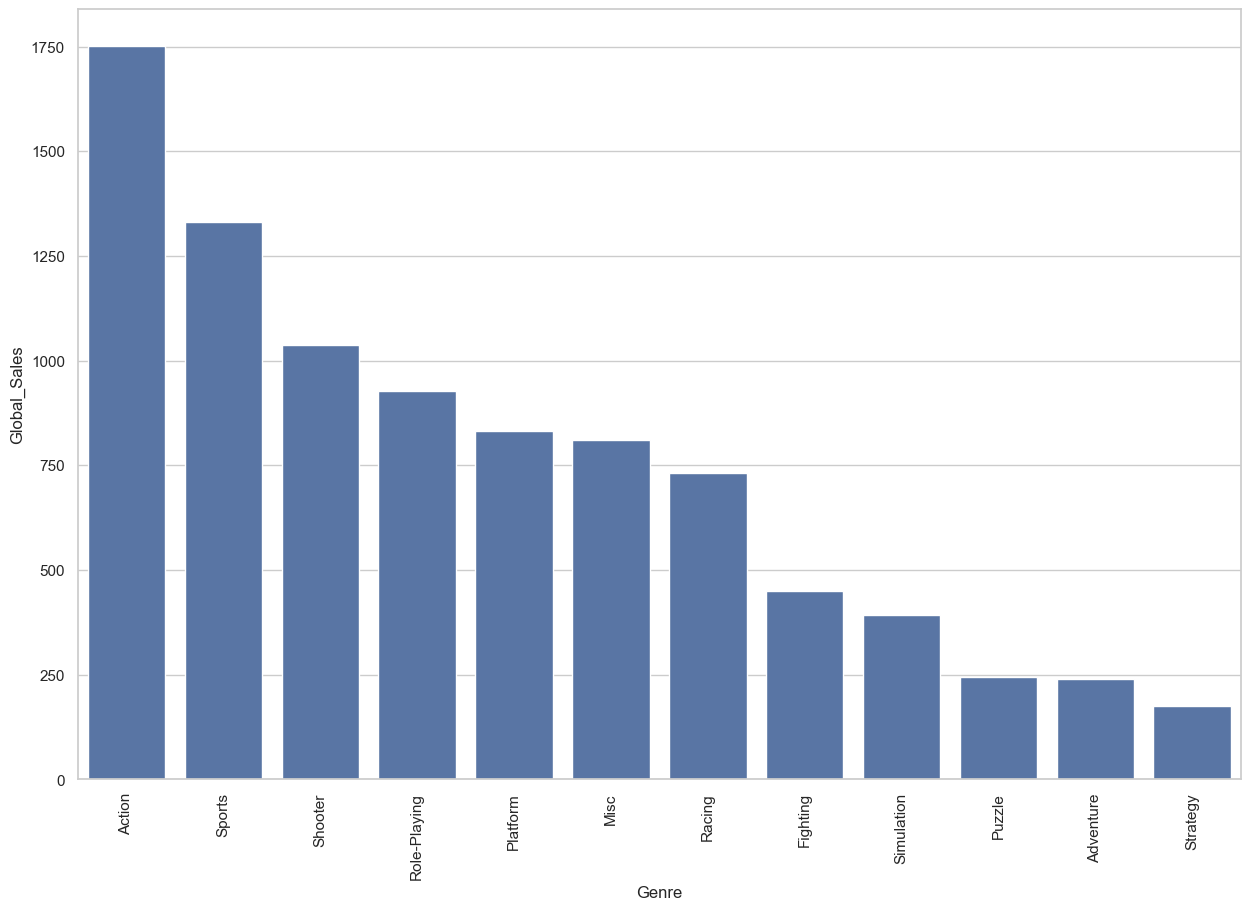

In [ ]:
# 將上面的資料畫出來
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#練習題
#哪一個開發商在日本地區的銷售總數最高

In [ ]:
#練習題
#哪一個平台在北美與歐洲地區的銷售總數最高

## 全球銷售數量前20大遊戲

In [ ]:
# 全球銷售數量前20大遊戲
top_game_sale = data.head(20) #資料已經是全球銷售數量排序過了，所以直接取前20筆
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales','Platform']]
# top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)
top_game_sale

,Name,Year,Genre,Global_Sales,Platform
0,Wii Sports,2006.0,Sports,82.74,Wii
1,Super Mario Bros.,1985.0,Platform,40.24,NES
2,Mario Kart Wii,2008.0,Racing,35.82,Wii
3,Wii Sports Resort,2009.0,Sports,33.00,Wii
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,31.37,GB
5,Tetris,1989.0,Puzzle,30.26,GB
6,New Super Mario Bros.,2006.0,Platform,30.01,DS
7,Wii Play,2006.0,Misc,29.02,Wii
8,New Super Mario Bros. Wii,2009.0,Platform,28.62,Wii
9,Duck Hunt,1984.0,Shooter,28.31,NES


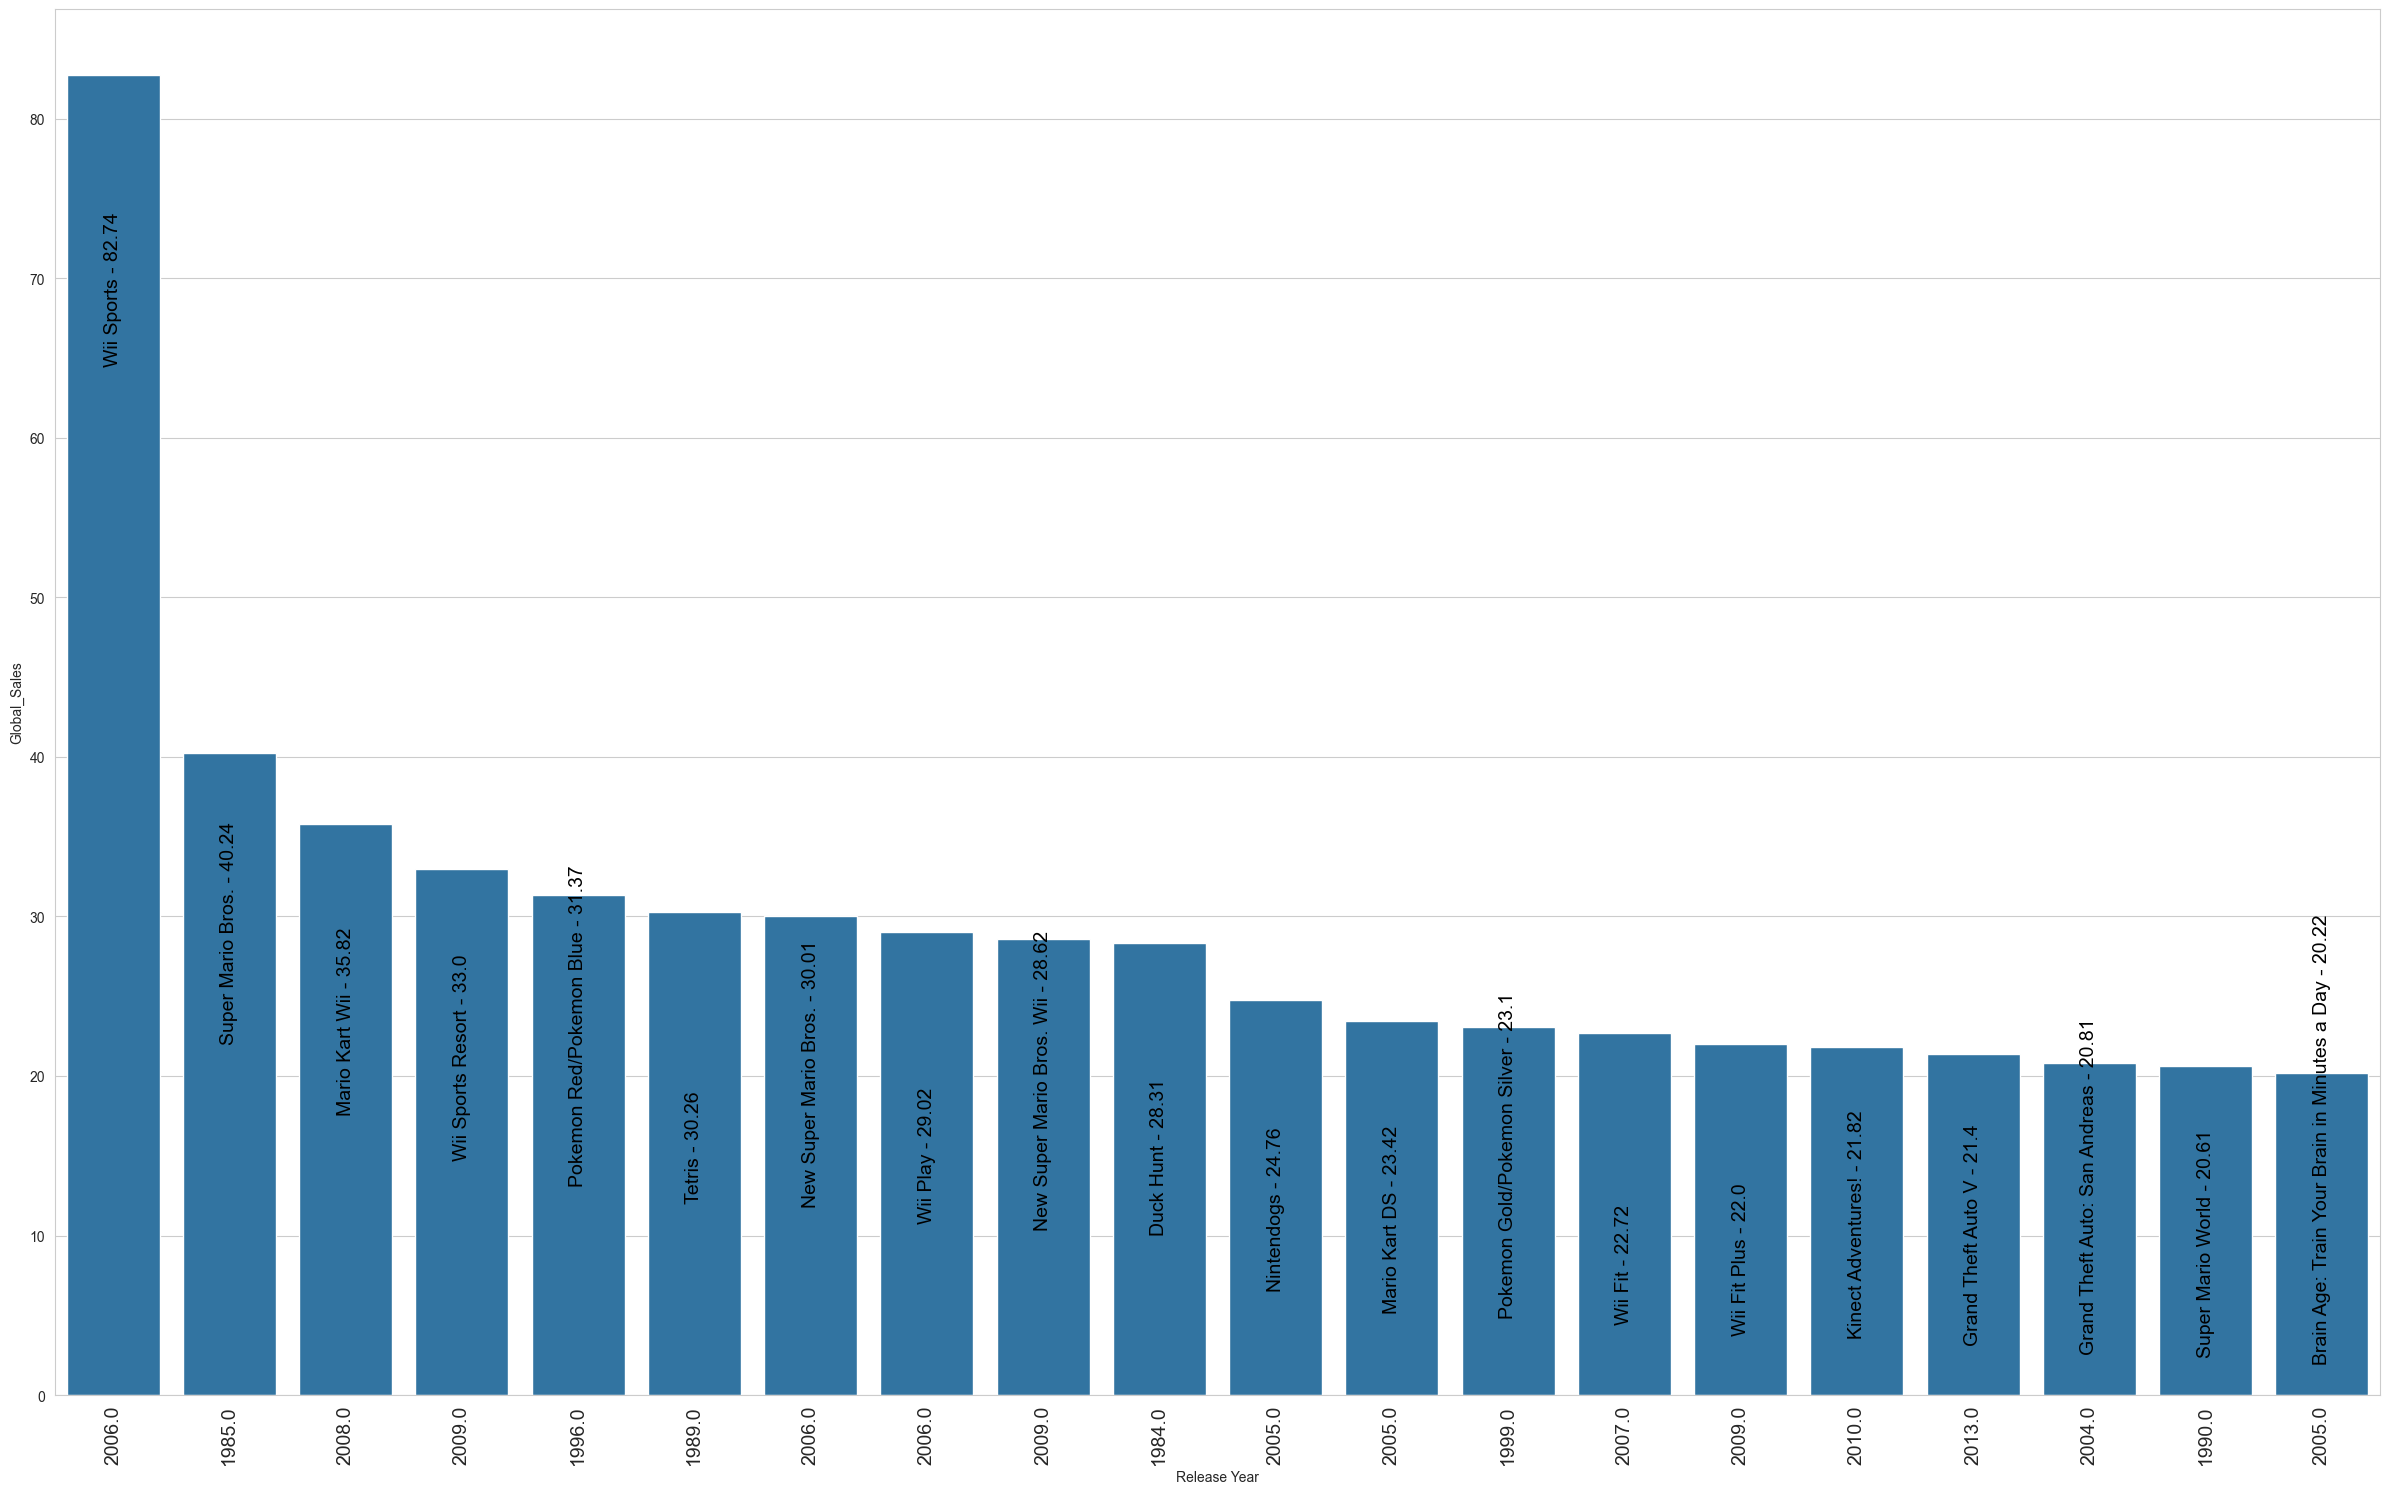

In [ ]:
# 使用直方圖把上面的資料畫出來
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index]+' - '+str(value), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.xlabel('Release Year')
plt.show()

In [ ]:
#練習題
#請畫出日本地區銷售數量前10名的遊戲

In [ ]:
#練習題
#請畫出日本地區銷售數量前10名的遊戲公司

## 比較各區域不同遊戲種類的銷售數量

In [ ]:
# 取出 遊戲總類 與 四個銷售地區 的欄位資料成為 新表格
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Sports,41.49,29.02,3.77,8.46
1,Platform,29.08,3.58,6.81,0.77
2,Racing,15.85,12.88,3.79,3.31
3,Sports,15.75,11.01,3.28,2.96
4,Role-Playing,11.27,8.89,10.22,1.00
...,...,...,...,...,...
16593,Platform,0.01,0.00,0.00,0.00
16594,Shooter,0.01,0.00,0.00,0.00
16595,Racing,0.00,0.00,0.00,0.00
16596,Puzzle,0.00,0.01,0.00,0.00


In [ ]:
# 根據上面的表格，以遊戲種類為群組，每個群組計算四個不同地區分別的銷售總合
comp_map = comp_genre.groupby(by=['Genre']).sum()
comp_map.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,877.83,525.00,159.95,187.38
Adventure,105.80,64.13,52.07,16.81
Fighting,223.59,101.32,87.35,36.68
Misc,410.24,215.98,107.76,75.32
Platform,447.05,201.63,130.77,51.59


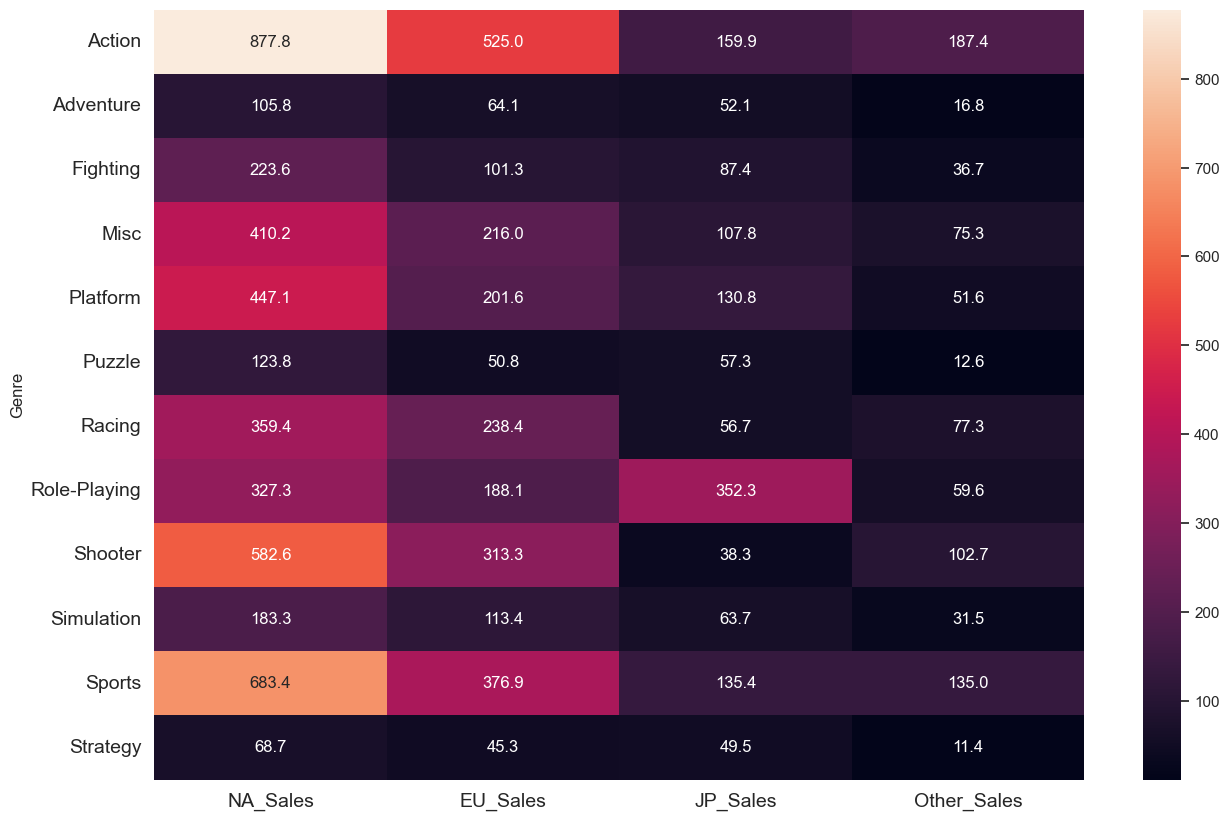

In [ ]:
# 使用HeatMAP畫出上面表格
# 提示 sns.heatmap()
plt.figure(figsize=(15, 10))
sns.set(font_scale=1) #設定字型的縮放比例
sns.heatmap(comp_map, annot=True, fmt = '.1f') #熱圖
plt.xticks(fontsize=14) #X座標字型
plt.yticks(fontsize=14) #Y座標字型
plt.show()

### 問題：從上圖能看出哪些結論？

In [ ]:
#練習題
#畫出不同平台各區域的銷售數量熱圖


# 根據遊戲種類的不同，畫出每個種類在四個不同地區的銷售總量

### Pandas melt() 示範

In [ ]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()
comp_table = comp_map.reset_index()

# pd.melt會將一個DataFrame拆解 key=欄位名稱, value=欄位值
comp_table = pd.melt(comp_table, id_vars=['Genre'],
                value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                var_name='Sale_Area', value_name='Sale_Price')
comp_table

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,877.83
1,Adventure,NA_Sales,105.80
2,Fighting,NA_Sales,223.59
3,Misc,NA_Sales,410.24
4,Platform,NA_Sales,447.05
5,Puzzle,NA_Sales,123.78
6,Racing,NA_Sales,359.42
7,Role-Playing,NA_Sales,327.28
8,Shooter,NA_Sales,582.60
9,Simulation,NA_Sales,183.31


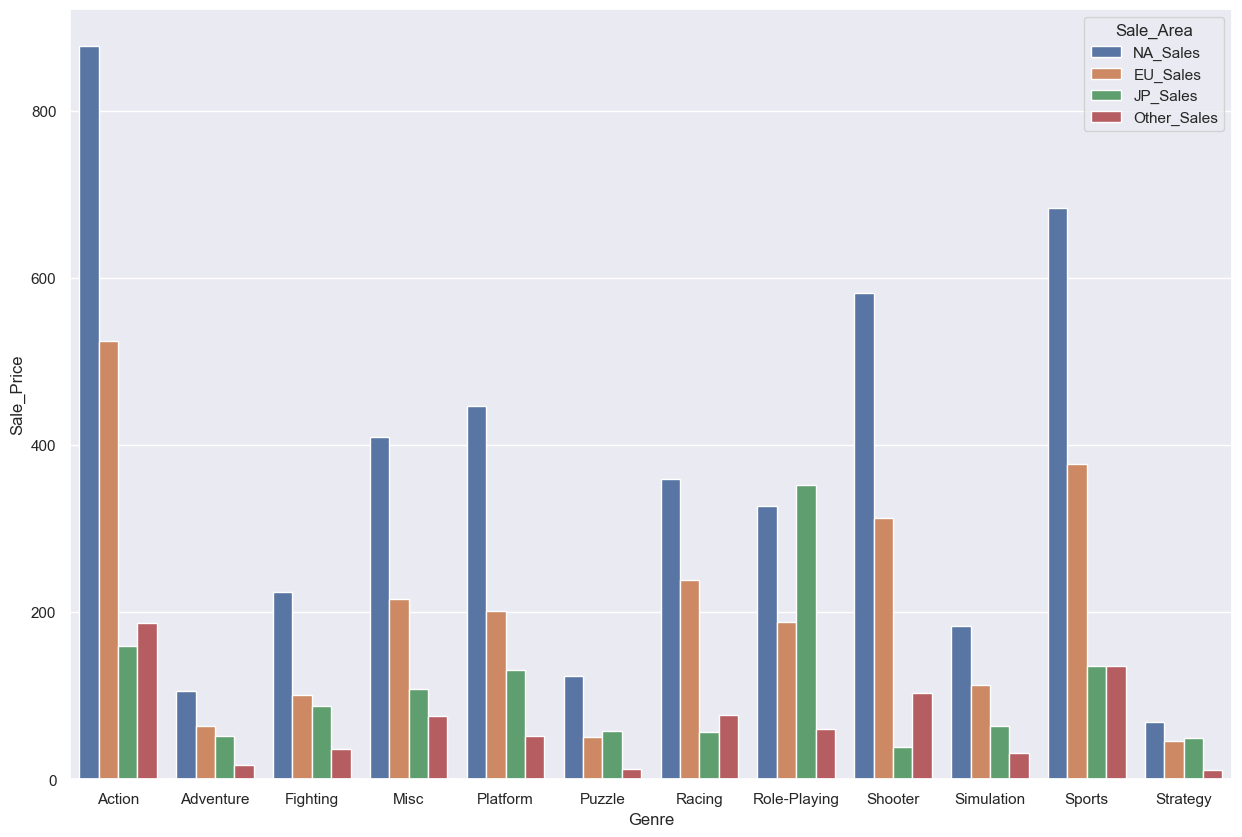

In [ ]:
# 根據上面的資料
# 使用直方圖畫出
# 根據遊戲種類的不同，畫出每個種類在四個不同地區的銷售總量
# 提示 barplot(), hue 參數可以設為 Sale_Area
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.show()

In [ ]:
# 練習題
# 根據遊戲種類的不同，畫出每個種類在四個不同地區的銷售總量

# 前20大開發商

In [ ]:
#列出每個開發商的遊戲數目
top_publisher = data.groupby(by='Publisher').size().sort_values(ascending=False).reset_index(name='Amount')
top_publisher

,Publisher,Amount
0,Electronic Arts,1351
1,Activision,975
2,Namco Bandai Games,932
3,Ubisoft,921
4,Konami Digital Entertainment,832
...,...,...
573,iWin,1
574,fonfun,1
575,Valve,1
576,Universal Gamex,1


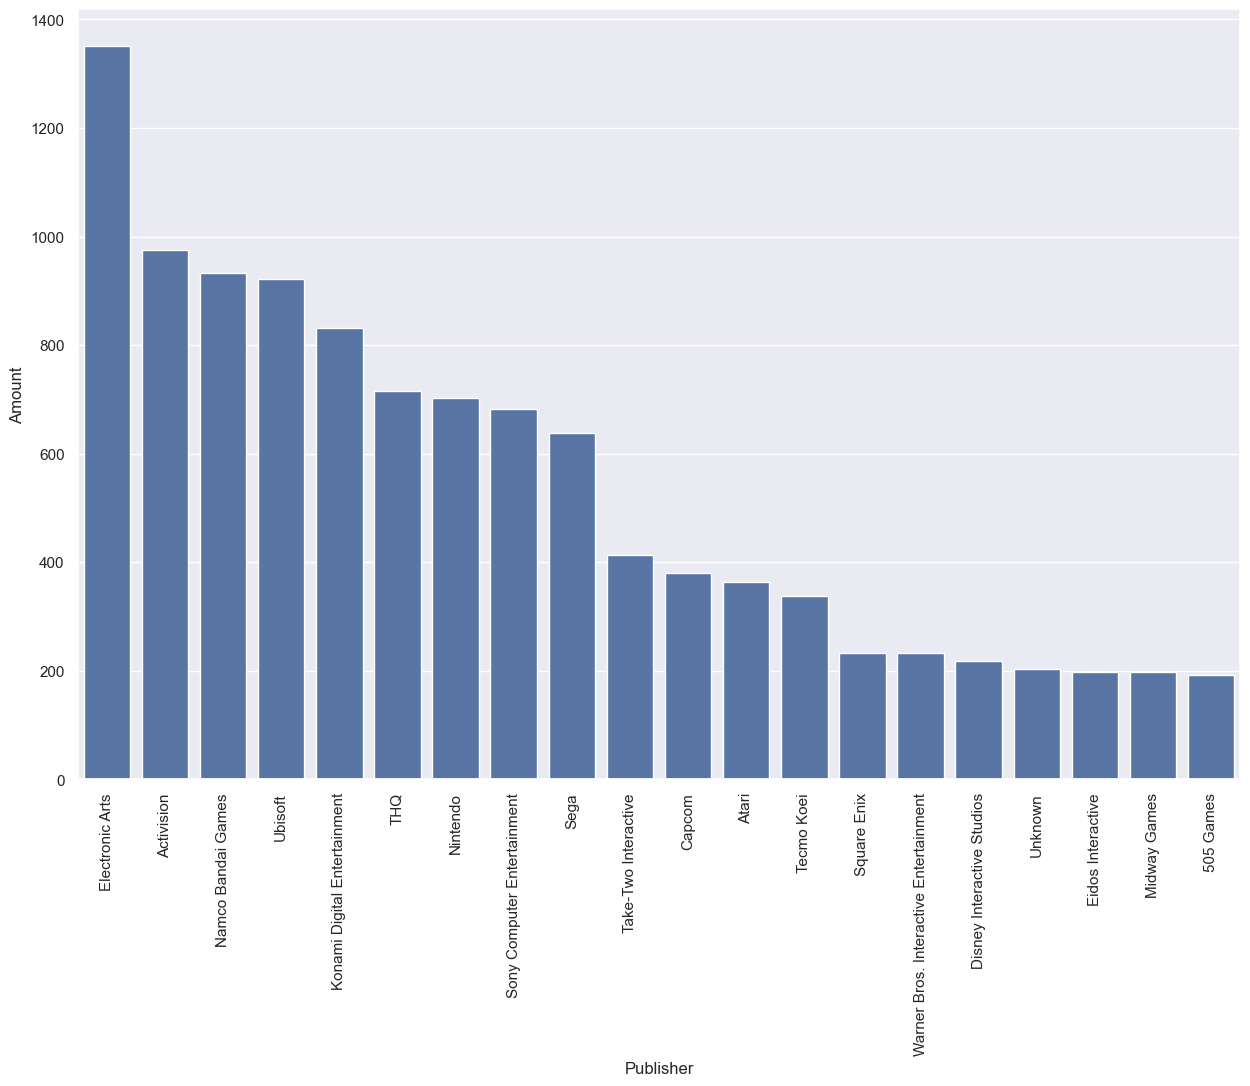

In [ ]:
# 用直方圖畫出前20大開發商的遊戲數量
plt.figure(figsize=(15, 10))
sns.barplot(data=top_publisher, x="Publisher", y='Amount',
              order = top_publisher['Publisher'][:20])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 練習題
# 用直方圖畫出前5大平台的遊戲數量

# 各遊戲開發商的全球銷售總數量

In [ ]:
#列出每個開發商的全球銷售總數量
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
sale_pbl

,Publisher,Global_Sales
0,Nintendo,1786.56
1,Electronic Arts,1110.32
2,Activision,727.46
3,Sony Computer Entertainment,607.50
4,Ubisoft,474.72
...,...,...
573,Epic Games,0.01
574,UIG Entertainment,0.01
575,Commseed,0.01
576,Ascaron Entertainment,0.01


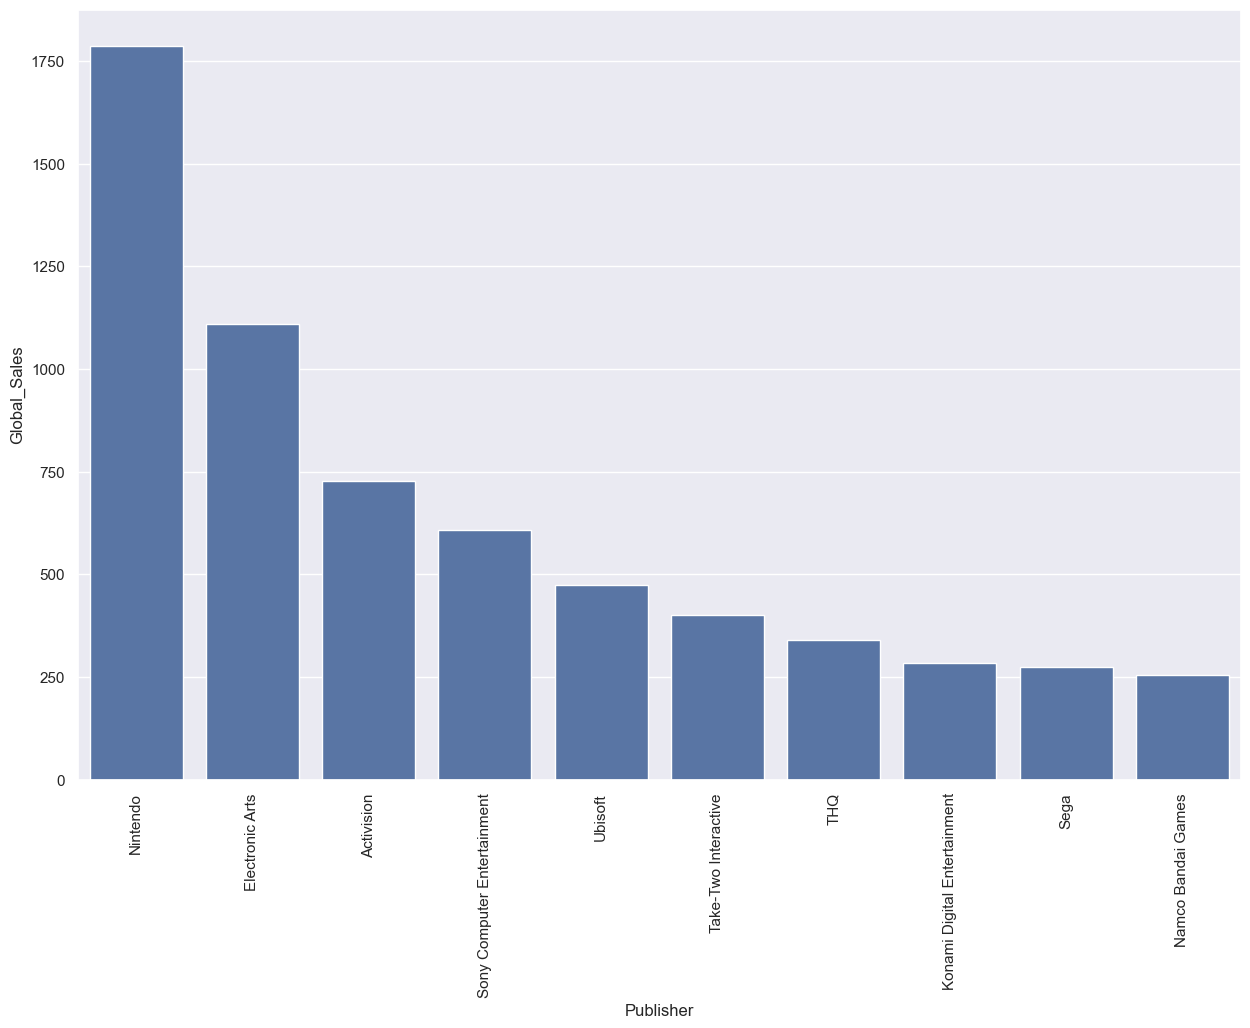

In [ ]:
# 根據上面資料畫出
# 各遊戲開發商的全球銷售總數量
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl[:10])
plt.xticks(rotation=90)
plt.show()

### 問題：根據上面兩張圖比較各遊戲廠商在遊戲數量與銷售的排名有何不同？

In [ ]:
#練習題
#畫出全球銷售遊戲數量前10大的遊戲平台

# 每年遊戲數目最多的開發商

In [ ]:
# 計算每年分別是那些開發商的遊戲數目最多
top_publisher =  data[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)
top_publisher_count

C:\Users\Clement\AppData\Local\Temp\ipykernel_21972\3656540996.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']


,Year,Publisher,Count
0,1980.0,Activision,5
1,1981.0,Atari,11
2,1982.0,Atari,14
3,1983.0,Nintendo,6
4,1984.0,Nintendo,9
5,1985.0,Nintendo,7
6,1986.0,Nintendo,6
7,1987.0,Nintendo,4
8,1988.0,Nintendo,6
9,1989.0,Nintendo,9


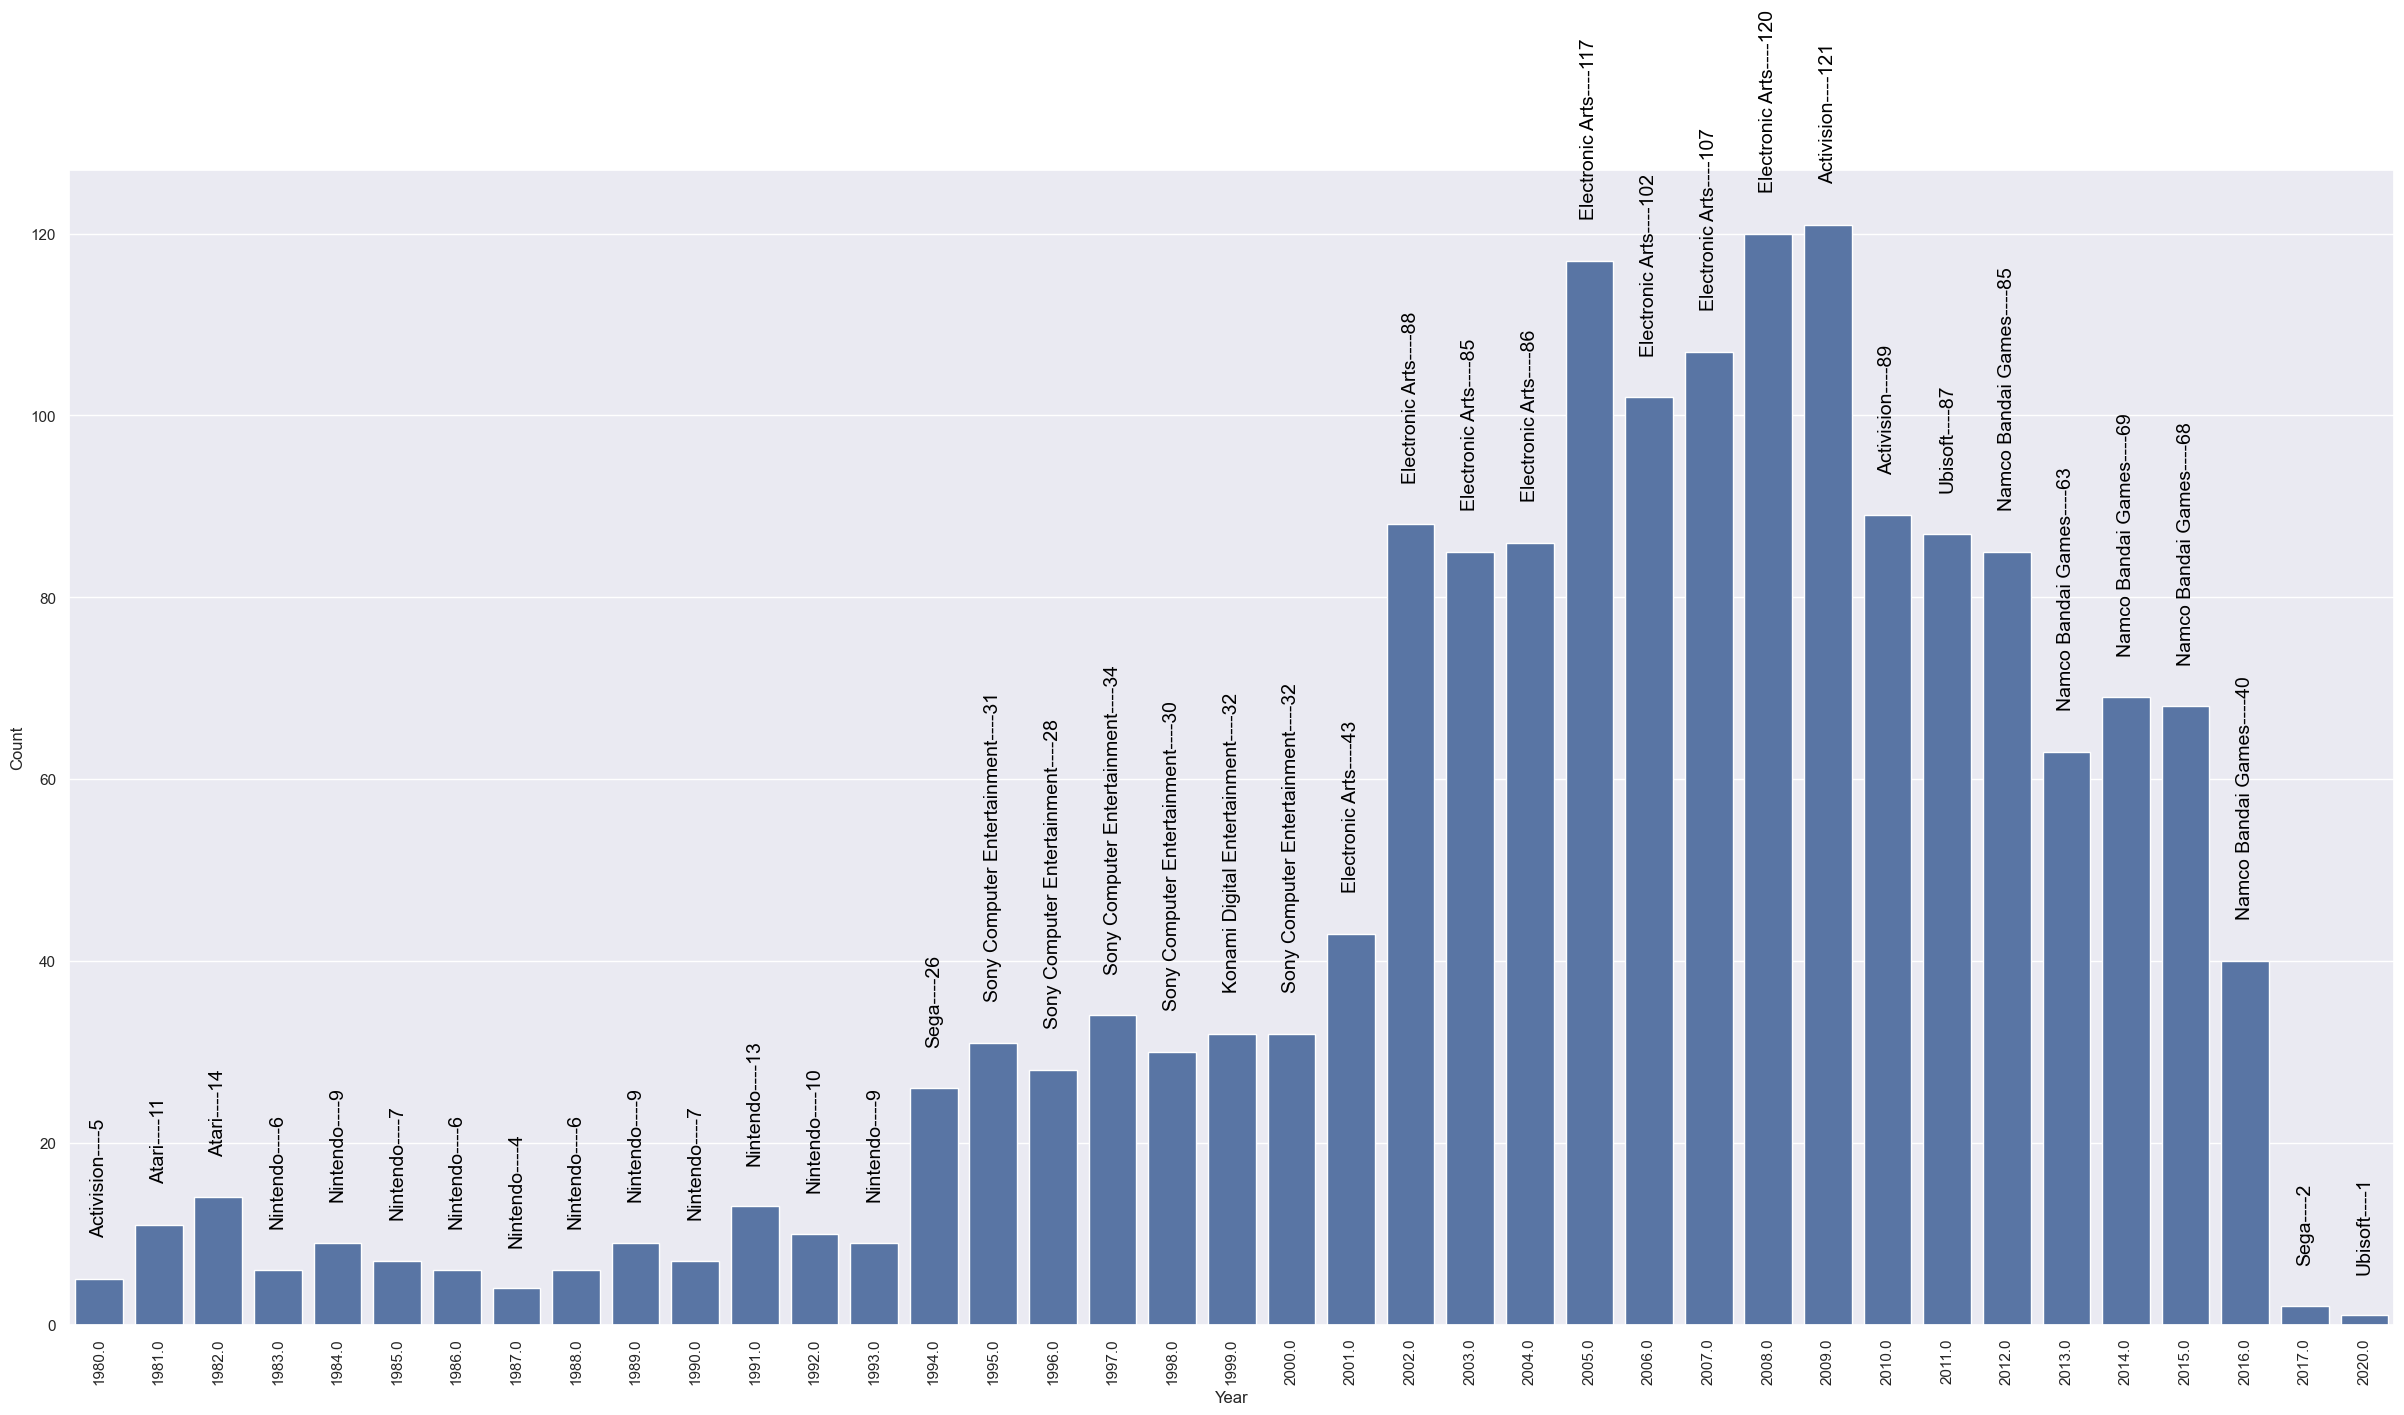

In [ ]:
# 使用直方圖畫出上面表格資料
publisher= top_publisher_count['Publisher']
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

# 各區域遊戲的銷售總量

In [ ]:
# 計算四個不同區域的遊戲銷售總量
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index(name='sale')
top_sale_reg = top_sale_reg.rename(columns={"index": "region"})
top_sale_reg

,region,sale
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


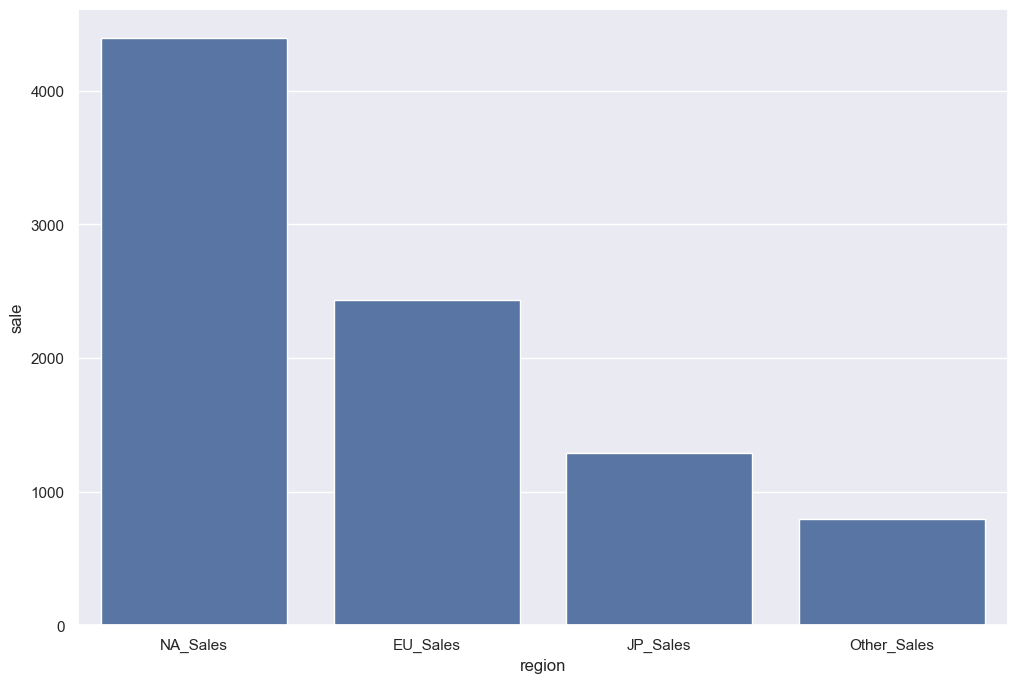

In [ ]:
# 使用直方圖來畫出各區域遊戲的銷售總量
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)
plt.show()

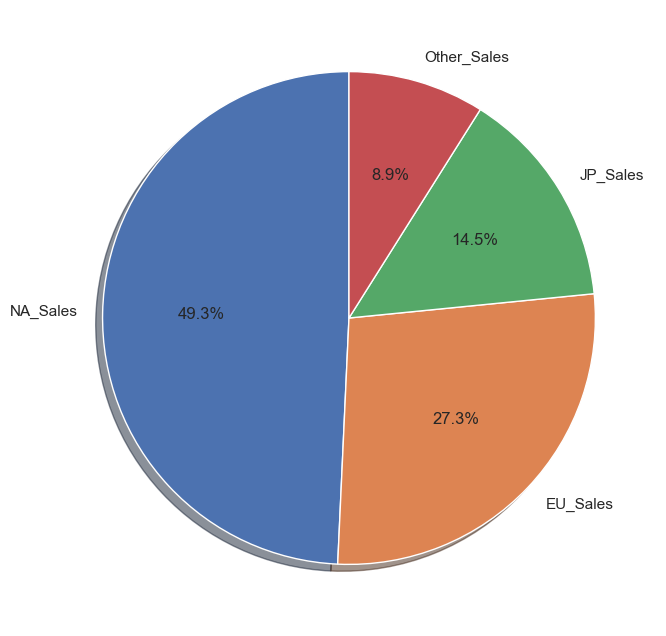

In [ ]:
# 使用圓餅圖來畫出各區域遊戲的銷售總量
# 提示： plt.pie()
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()